<a href="https://colab.research.google.com/github/AJ-0504/GradeAnalysisandPrediction/blob/main/Students_grade_Analysis%26Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful. You can find the dataset on kaggle here on this link.

## **Attributes Information:**

1. **`school`** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).

2. **`sex`** - student's sex (binary: 'F' - female or 'M' - male).

3. **`age`** - student's age (numeric: from 15 to 22).

4. **`address`** - student's home address type (binary: 'U' - urban or 'R' - rural).

5. **`famsize`** - family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).

6. **`Pstatus`**- parent's cohabitation status (binary: 'T' - living together or 'A' - apart).

7. **`Medu`** - mother's education (numeric: **0** - none, **1** - primary education (4th grade), **2** - 5th to 9th grade, **3** - secondary education or **4** - higher education).

8. **`Fedu`** - father's education (numeric: **0** - none, **1** - primary education (4th grade), **2** - 5th to 9th grade, **3** - secondary education or **4** - higher education).

9. **`Mjob`** - mother's job (nominal: '*teacher*', '*health*' care related, civil '*services*' (e.g. administrative or police), '*at_home*' or '*other*').

10. **`Fjob`**- father's job (nominal: '*teacher*', '*health*' care related, civil '*services*' (e.g. administrative or police), '*at_home*' or '*other*').

11. **`reason`** - reason to choose this school (nominal: close to '*home*', school '*reputation*', '*course*' preference or '*other*').

12. **`guardian`** - student's guardian (nominal: 'mother', 'father' or 'other').

13. **`traveltime`** - home to school travel time (numeric: **1** - <15 min., **2** - 15 to 30 min., **3** - 30 min. to 1 hour, or **4** - >1 hour).

14. **`studytime`** - weekly study time (numeric: **1** - <2 hours, **2** - 2 to 5 hours, **3** - 5 to 10 hours, or **4** - >10 hours).

15. **`failures`** - number of past class failures (numeric: n if **0 <= n < 3**, else **3**).

16. **`schoolsup`** - extra educational support (binary: yes or no).

17. **`famsup`** - family educational support (binary: yes or no).

18. **`paid`** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).

19. **`activities`** - extra-curricular activities (binary: yes or no).

20. **`nursery`** - attended nursery school (binary: yes or no).

21. **`higher`** - wants to take higher education (binary: yes or no).

22. **`internet`** - Internet access at home (binary: yes or no).

23. **`romantic`** - with a romantic relationship (binary: yes or no).

24. **`famrel`** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent).

25. **`freetime`** - free time after school (numeric: from **1** - very low to **5** - very high).

26. **`goout`** - going out with friends (numeric: from **1** - very low to **5** - very high).

27. **`Dalc`** - workday alcohol consumption (numeric: from **1** - very low to **5** - very high).

28. **`Walc`** - weekend alcohol consumption (numeric: from **1** - very low to **5** - very high).

29. **`health`** - current health status (numeric: from **1** - very bad to **5** - very good).

30. **`absences`** - number of school absences (numeric: from **0** to **93**).

##  **Grades which are related with the course subject:**

31. **`G1`** - first period grade (numeric: from **0** to **20**).
32. **`G2`** - second period grade (numeric: from **0** to **20**)
33. **`G3`** - final grade (numeric: from **0** to **20**, `Output Target`)


## **Important Imports**


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pickle
import pydotplus

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    BayesianRidge,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.svm import LinearSVC
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## **Loading Data**

In [2]:
df = pd.read_csv('/content/student-mat.csv')

#### Displaying the number of columns and the size of the data

In [3]:
df.shape

(395, 33)

**Note**: We have 395 rows with 33 columns.

#### Displaying the first 5 rows

In [4]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

#### Displaying the last 5 rows

In [5]:
df.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

#### Displaying the datatypes of each attributes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### Displaying the categorical attributes.

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
17


#### Displaying the numerical attributes.

In [8]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


#### Displaying some statistics about the numerical data.

In [9]:
df.describe().T

count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.319195   3.0   8.0  11.0  13.0  19.0
G2          395.0  10.713924  3.761505   0.0   9.0  11.0  13.0  19.0
G3          395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0

#### Displaying some statistics about categorical data.

In [10]:
df.describe(include='object')


school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     307     281     354    141    217     145      273   

       schoolsup famsup paid activities nursery higher internet romantic  
count        395    395  395        395     395    395      395      395  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no        yes     yes    yes      yes       no  
freq         344    242  214        201     314    375      329      263

## **Data Analysis(EDA)**

<Figure size 600x400 with 0 Axes>

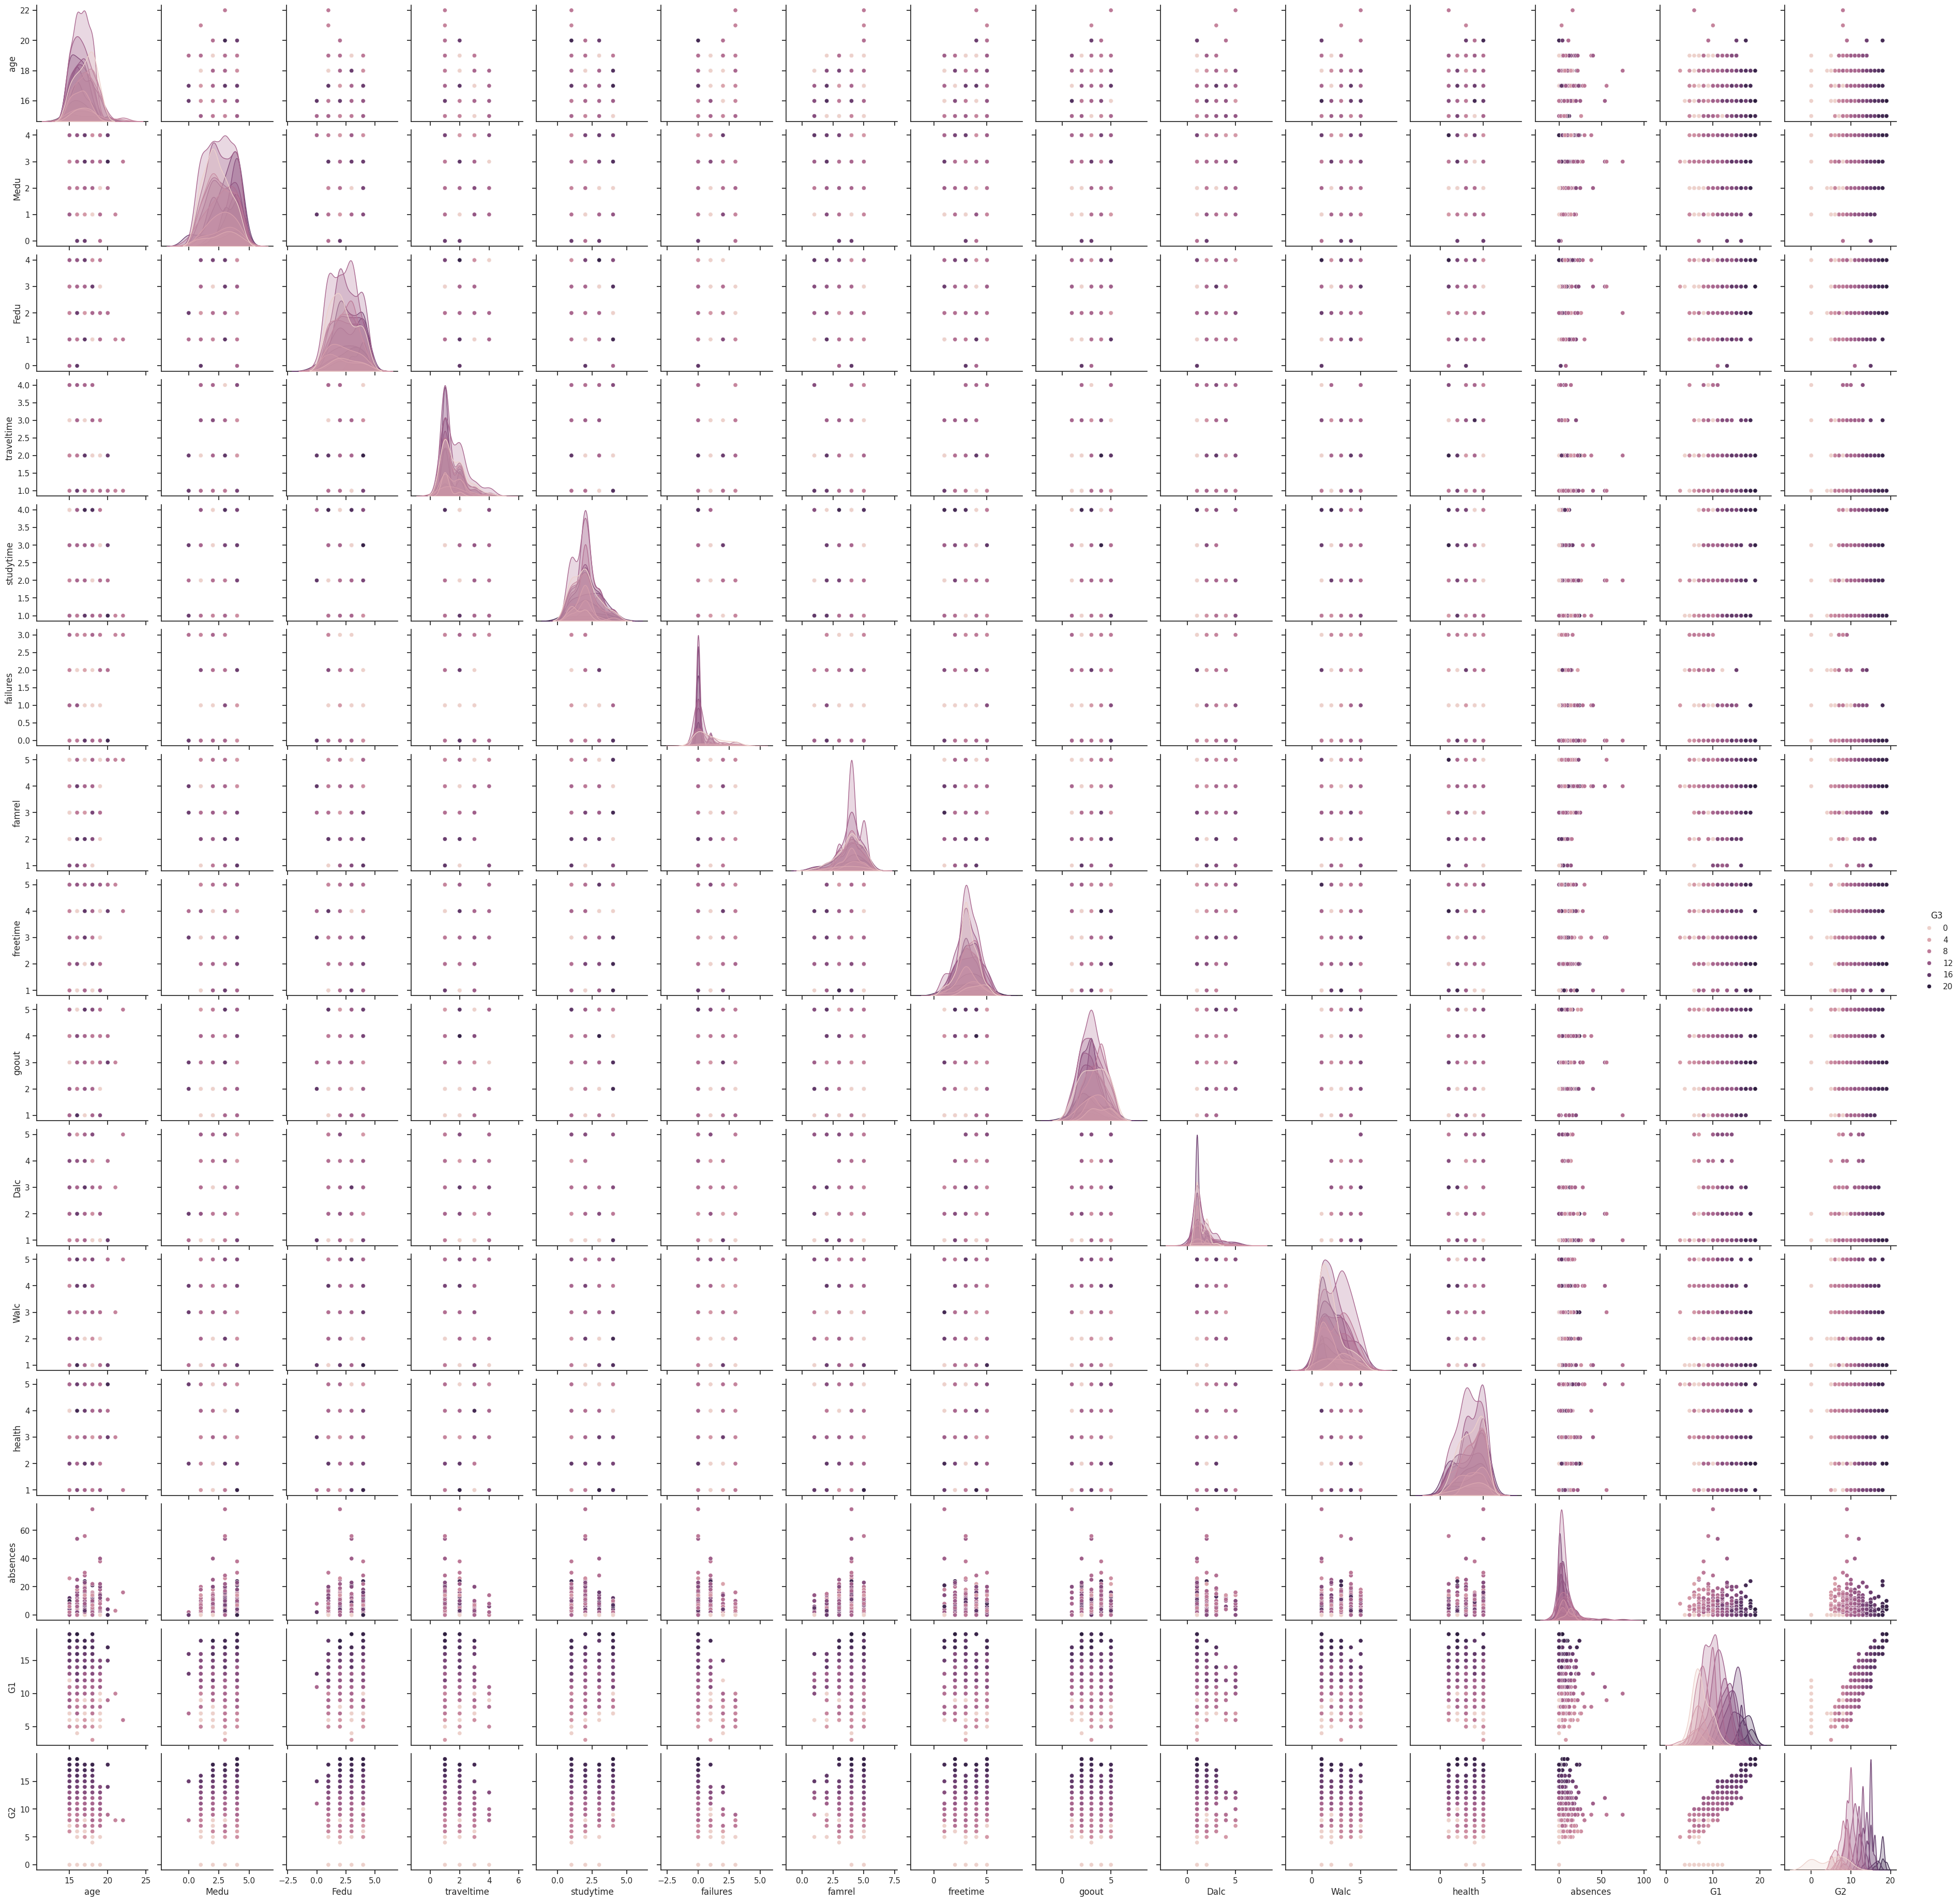

In [11]:
plt.figure(figsize=(6, 4))
sns.set_theme(style="ticks")
sns.pairplot(df, hue="G3")

### The distribution of the grades.

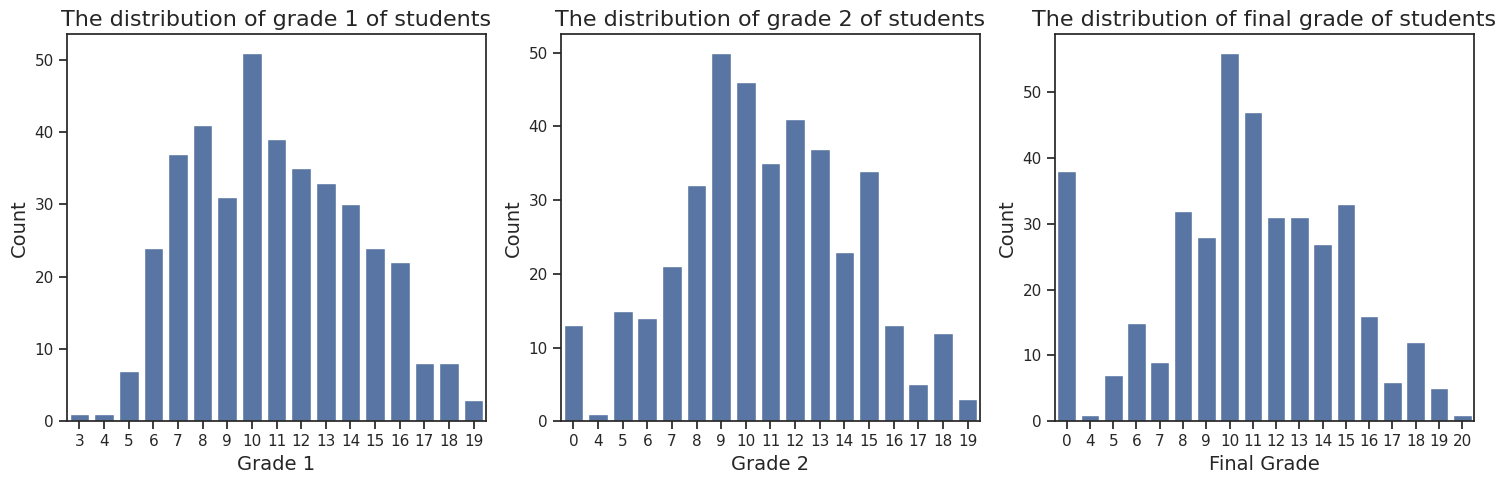

In [12]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for G1
b1 = sns.countplot(x='G1', data=df, ax=axs[0])
b1.set_title('The distribution of grade 1 of students', fontsize=16)
b1.set_xlabel('Grade 1', fontsize=14)
b1.set_ylabel('Count', fontsize=14)

# Plot for G2
b2 = sns.countplot(x='G2', data=df, ax=axs[1])
b2.set_title('The distribution of grade 2 of students', fontsize=16)
b2.set_xlabel('Grade 2', fontsize=14)
b2.set_ylabel('Count', fontsize=14)

# Plot for G3
b3 = sns.countplot(x='G3', data=df, ax=axs[2])
b3.set_title('The distribution of final grade of students', fontsize=16)
b3.set_xlabel('Final Grade', fontsize=14)
b3.set_ylabel('Count', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### **Checking For Missing Values**

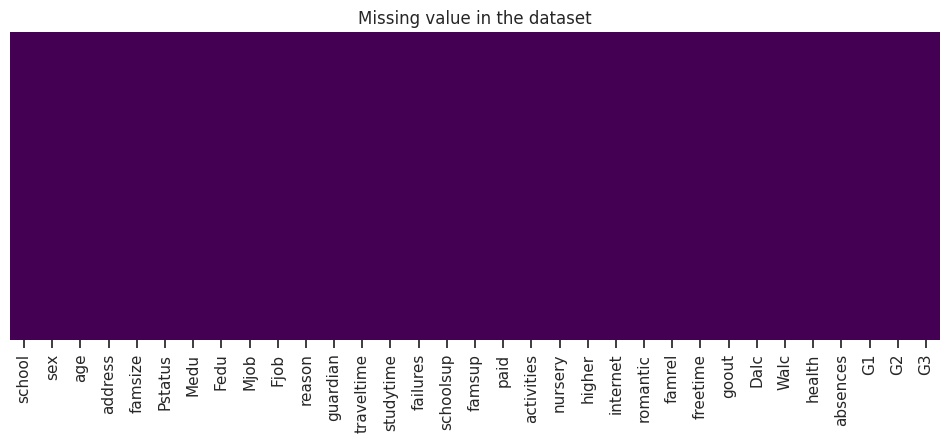

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

**Note**: As we can see there is no missing values so we can consider the other hypothesis.(The students who failed to show up for the test or who were denied permission to take it for another reason receive a score of '0').

### **Does the school play any significant role in the grades of student?**

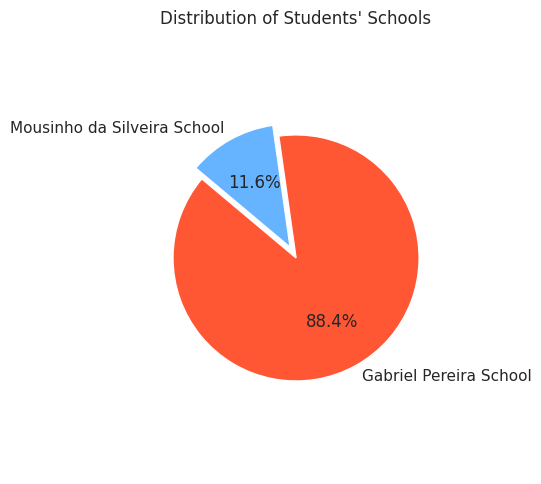

In [14]:
import matplotlib.pyplot as plt

# Calculate percentage values
total = len(df)
value_counts = df['school'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'GP' and 'MS' to custom names
value_counts.index = ['Gabriel Pereira School', 'Mousinho da Silveira School']

# Define custom colors
custom_colors = ['#ff5733', '#66b3ff']  # A vibrant red and a bright blue

# Define an explode parameter to separate one of the sections
explode = (0.1, 0)  # This will explode the first section (Gabriel Pereira School) slightly

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(5, 5))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    explode=explode  # Add the explode parameter here
)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title("Distribution of Students' Schools")

# Show the plot
plt.tight_layout()
plt.show()


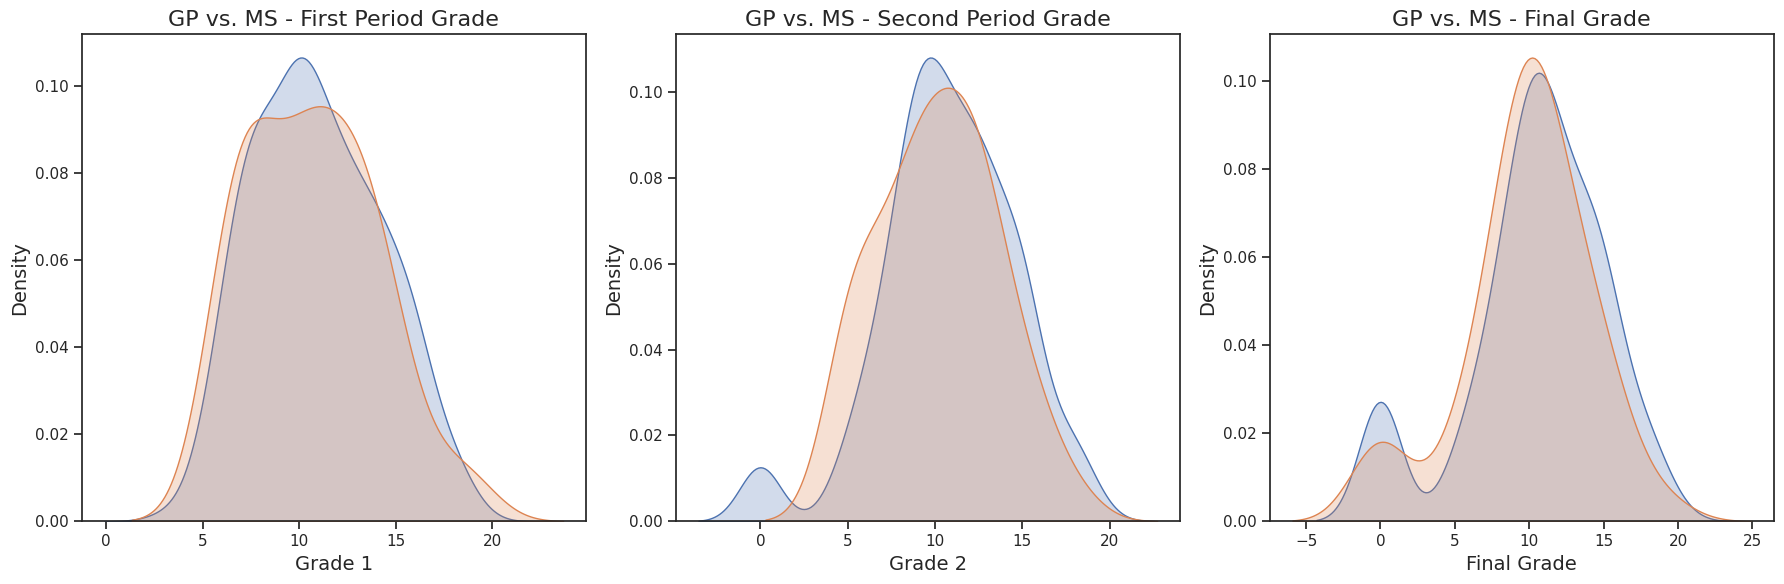

In [15]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade distribution by school for G1
sns.kdeplot(df.loc[df['school'] == 'GP', 'G1'], label='GP', shade=True, ax=axs[0])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G1'], label='MS', shade=True, ax=axs[0])
axs[0].set_title('GP vs. MS - First Period Grade', fontsize=16)
axs[0].set_xlabel('Grade 1', fontsize=14)
axs[0].set_ylabel('Density', fontsize=14)

# Grade distribution by school for G2
sns.kdeplot(df.loc[df['school'] == 'GP', 'G2'], label='GP', shade=True, ax=axs[1])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G2'], label='MS', shade=True, ax=axs[1])
axs[1].set_title('GP vs. MS - Second Period Grade', fontsize=16)
axs[1].set_xlabel('Grade 2', fontsize=14)
axs[1].set_ylabel('Density', fontsize=14)

# Grade distribution by school for G3
sns.kdeplot(df.loc[df['school'] == 'GP', 'G3'], label='GP', shade=True, ax=axs[2])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G3'], label='MS', shade=True, ax=axs[2])
axs[2].set_title('GP vs. MS - Final Grade', fontsize=16)
axs[2].set_xlabel('Final Grade', fontsize=14)
axs[2].set_ylabel('Density', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Note**: here we can see that school doesnt play any significant role in the grades of student.

### **Does the gender play any significant role in the grades of student?**

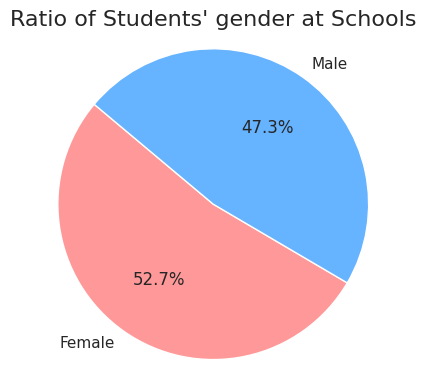

In [16]:
# Calculate percentage values
total = len(df)
value_counts = df['sex'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'F' and 'M' to custom names
value_counts.index = ['Female', 'Male']

# Define custom colors
custom_colors = ['#ff9999', '#66b3ff']  # You can change these colors as desired

# Define an explode parameter to separate one of the sections
#explode = (0.061, 0)  # This will explode the first section (Female) slightly

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(4, 4))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    #explode=explode  # Add the explode parameter here
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title("Ratio of Students' gender at Schools", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### What is the relationship of the gender and school with the Target?


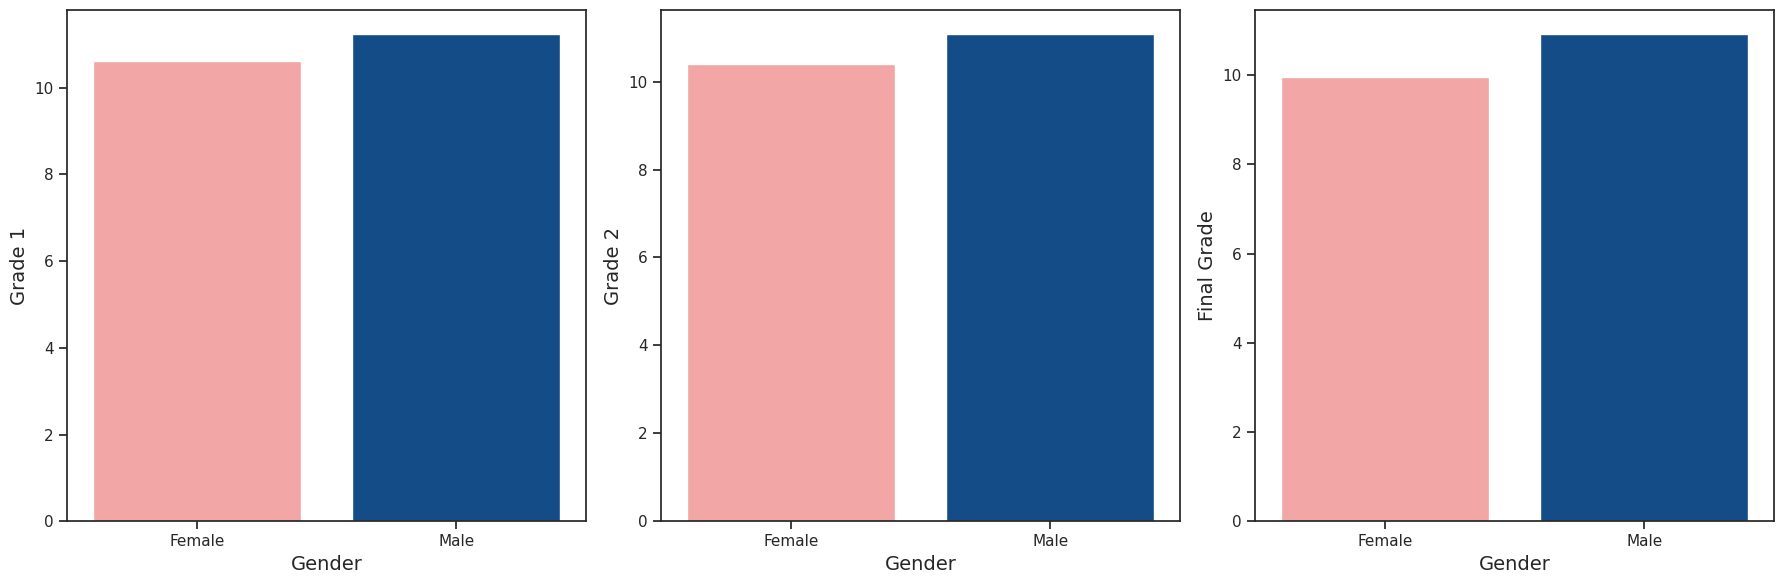

In [17]:
# Define custom colors
custom_colors = ['#ff9999', '#004c99']  # Darker blue color for the second bar, you can change these colors as desired

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for G1 with custom colors
sns.barplot(x='sex', y='G1', data=df, ci=None, ax=axs[0], palette=custom_colors)
axs[0].set_xlabel('Gender', fontsize=14)
axs[0].set_ylabel('Grade 1', fontsize=14)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["Female", "Male"])

# Plot for G2 with custom colors
sns.barplot(x='sex', y='G2', data=df, ci=None, ax=axs[1], palette=custom_colors)
axs[1].set_xlabel('Gender', fontsize=14)
axs[1].set_ylabel('Grade 2', fontsize=14)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["Female", "Male"])

# Plot for G3 with custom colors
sns.barplot(x='sex', y='G3', data=df, ci=None, ax=axs[2], palette=custom_colors)
axs[2].set_xlabel('Gender', fontsize=14)
axs[2].set_ylabel('Final Grade', fontsize=14)
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(["Female", "Male"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### **What about the relation between the schools students gender and grades ?**

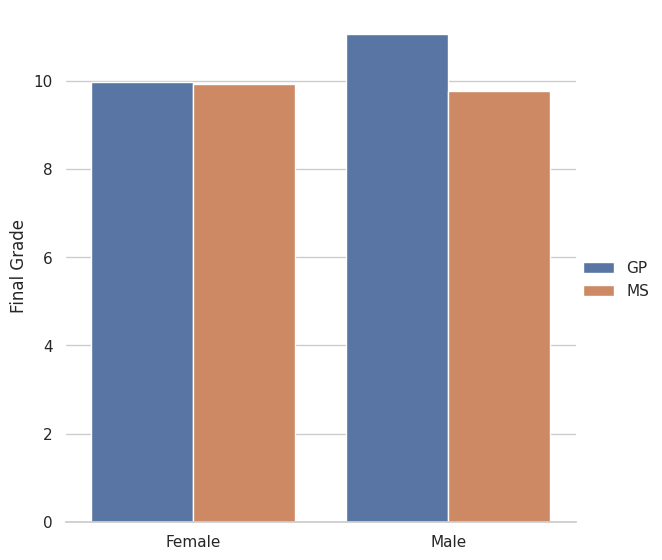

In [18]:
custom_colors = ['#ff9999', '#66b3ff']  # You can change these colors as desired
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="sex", y="G3", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
custom_xtitles = ["Female", "Male"]
g.set_xticklabels(custom_xtitles)
g.set_axis_labels("", "Final Grade")
g.legend.set_title("")

**Note**: Males score slightly higher than the females and final grades.

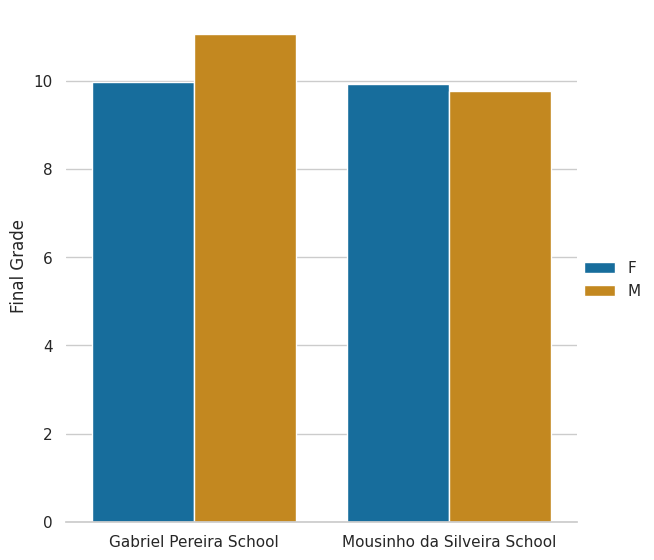

In [19]:
# Set a custom color palette
custom_palette = sns.color_palette("colorblind")

# Set the Seaborn style with the custom color palette
sns.set_theme(style="whitegrid", palette=custom_palette)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="school", y="G3", hue="sex",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
new_x_labels = ["Gabriel Pereira School", "Mousinho da Silveira School"]  # Modify these labels as needed
plt.xticks(range(len(new_x_labels)), new_x_labels)

g.set_axis_labels("", "Final Grade")

g.legend.set_title("")


### **Number of students in different age groups**

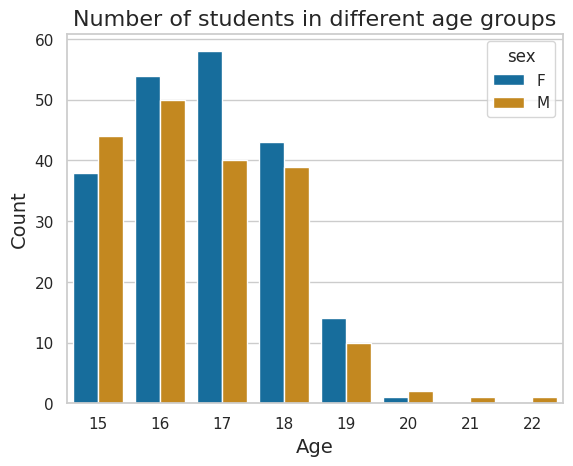

In [20]:
b = sns.countplot(x='age', hue='sex', data=df)
b.axes.set_title('Number of students in different age groups', fontsize=16)
b.set_xlabel("Age", fontsize=14)
b.set_ylabel("Count", fontsize=14)
plt.show()


**Note**: The ages seem to be ranging from 15 to 19 and the most of the students are 16-year-old.

#### **Plotting the scatterplot rather than statistics wich would help us better understand the data**


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


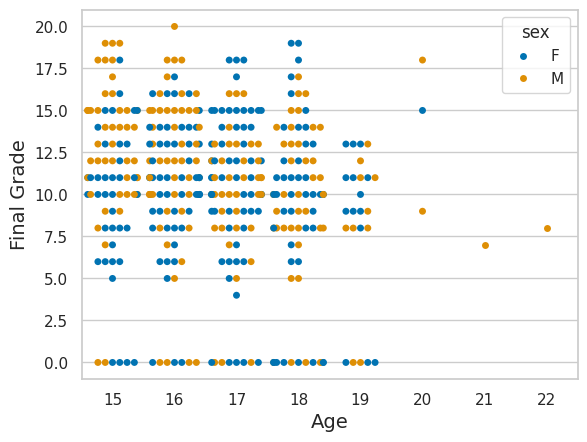

In [21]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=df)
b.set_xlabel('Age', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

**Note**: We see that the age 20 has only 3 data points hence the inconsistency in statistics(the students with age 20 score the most).

### **What about the address?**

#### **Count of students from urban and rural areas**

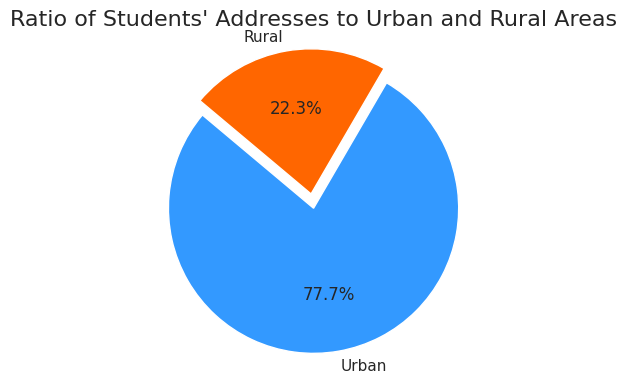

In [22]:
import matplotlib.pyplot as plt

# Calculate percentage values
total = len(df)
value_counts = df['address'].value_counts()
percentages = value_counts / total * 100

# Define custom colors for each part
colors = ['#3399ff', '#ff6600']

# Define the amount of space between the parts
explode = (0.1, 0)

# Define custom labels for the parts
custom_labels = ['Urban', 'Rural']

# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(
    percentages,
    labels=custom_labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=colors,  # Use custom colors
    explode=explode,  # Add space between parts
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Update the title
plt.title("Ratio of Students' Addresses to Urban and Rural Areas", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**Note**: We can see that the most of students are **Urban**.

#### **Most students are from urban areas, but do urban students perform better than rurual students?**

<ipython-input-23-ab8f7e9ee0c5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(["Urban", "Rural"])
<ipython-input-23-ab8f7e9ee0c5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(["Urban", "Rural"])
<ipython-input-23-ab8f7e9ee0c5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(["Urban", "Rural"])


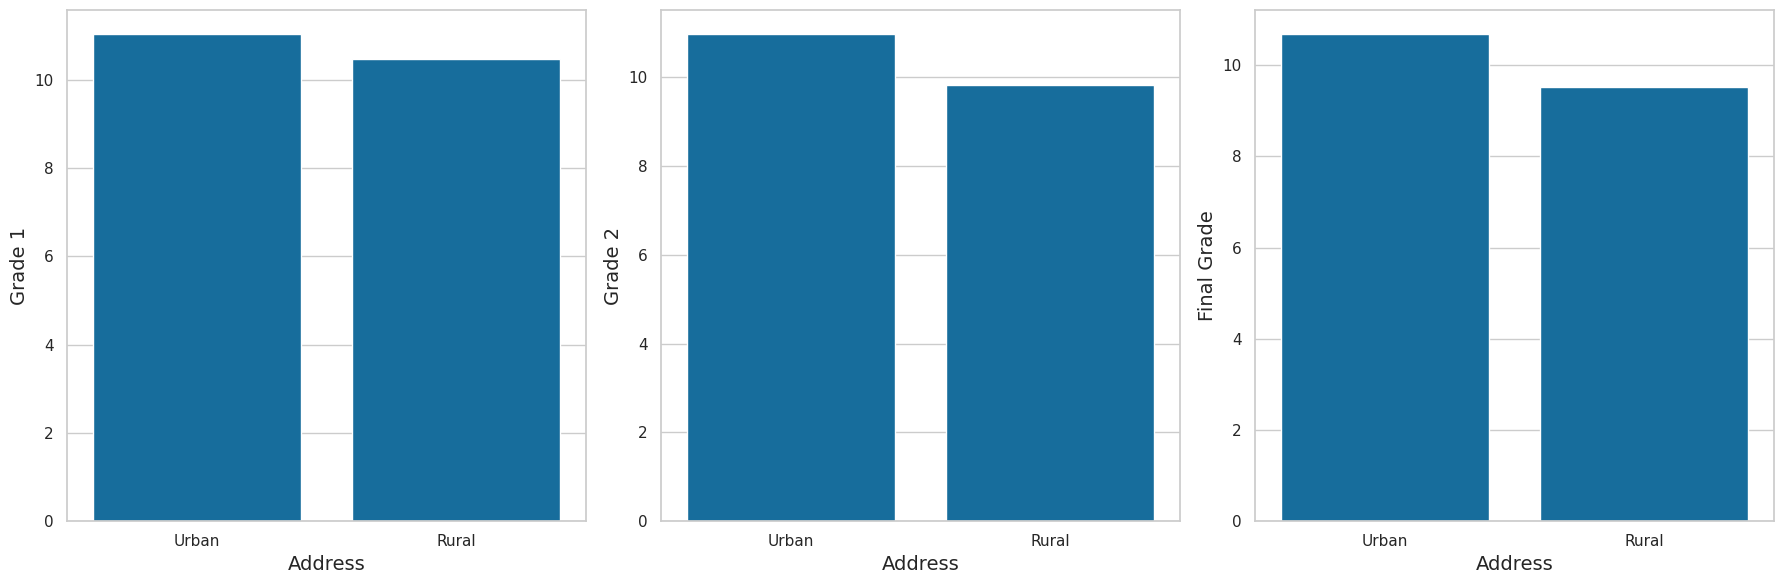

In [23]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
sns.barplot(x=df['address'], y=df['G1'], data=df, ci=None, ax=axs[0])
axs[0].set_xlabel('Address', fontsize=14)
axs[0].set_ylabel('Grade 1', fontsize=14)
axs[0].set_xticklabels(["Urban", "Rural"])

# Grade 2 plot
sns.barplot(x=df['address'], y=df['G2'], data=df, ci=None, ax=axs[1])
axs[1].set_xlabel('Address', fontsize=14)
axs[1].set_ylabel('Grade 2', fontsize=14)
axs[1].set_xticklabels(["Urban", "Rural"])

# Final Grade plot
sns.barplot(x=df['address'], y=df['G3'], data=df, ci=None, ax=axs[2])
axs[2].set_xlabel('Address', fontsize=14)
axs[2].set_ylabel('Final Grade', fontsize=14)
axs[2].set_xticklabels(["Urban", "Rural"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note**: Here also students of **Urban** area got slightly higher grades than of **Rural** area.


### **What is the relationship between the grades and the reason to choose the school?**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


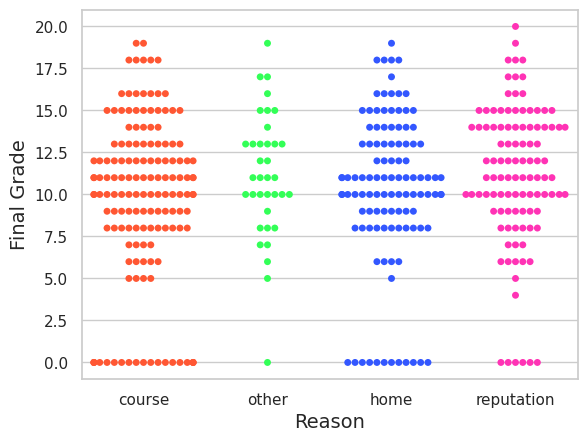

In [24]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#FF33B5"]
b = sns.swarmplot(x='reason', y='G3', data=df,palette=custom_palette)
b.set_xlabel('Reason', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

**Note**: We can see that the students who chose to join this school because of specific course, close to their home, or because of school reputation got final grades slightly higher than others.

### **Does the family size effect on the students grades?**

<ipython-input-25-8dd68ef154b2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b1.set_xticklabels(["Greater Than Three", "Less Than Three"])
<ipython-input-25-8dd68ef154b2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  b2.set_xticklabels(["Greater Than Three", "Less Than Three"])
<ipython-input-25-8dd68ef154b2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  b3.set_xticklabels(["Greater Than Three", "Less Than Three"])


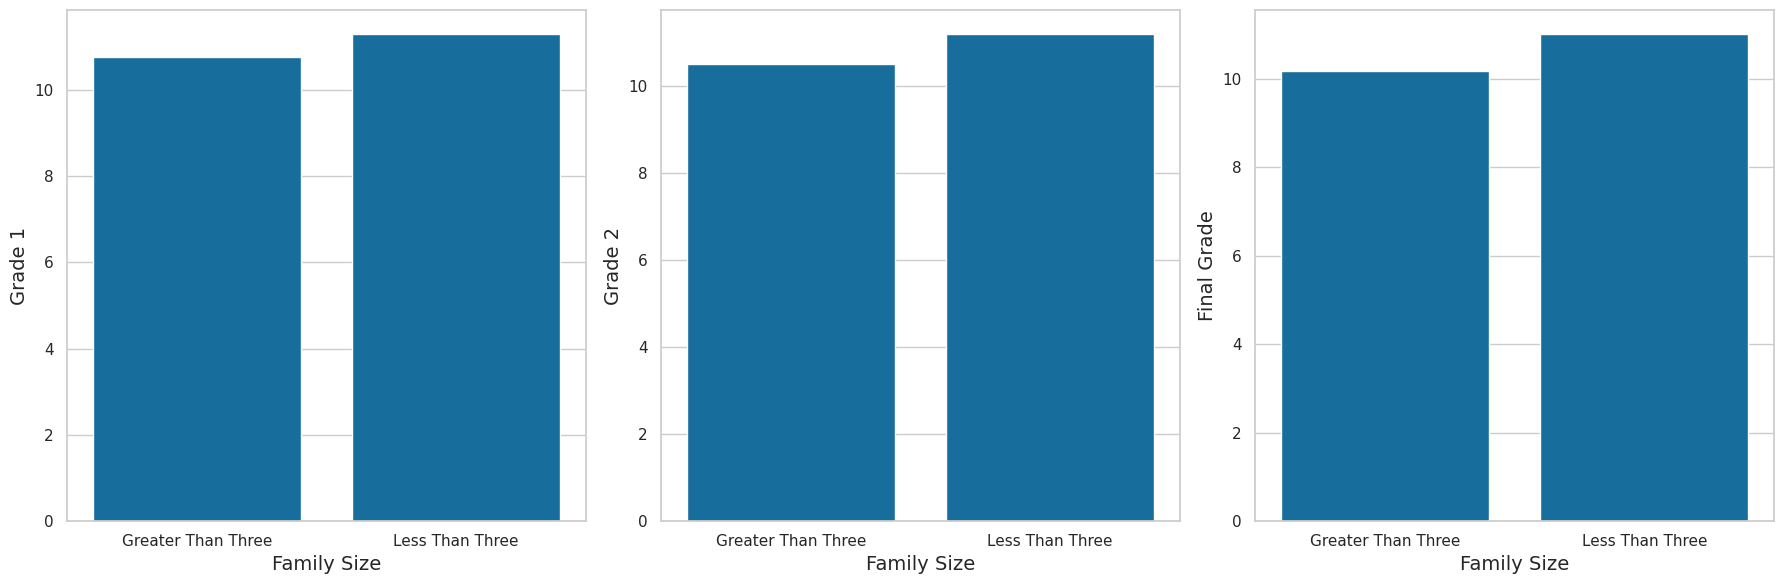

In [25]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=df['famsize'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel('Family Size', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Greater Than Three", "Less Than Three"])

# Grade 2 plot
b2 = sns.barplot(x=df['famsize'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel('Family Size', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Greater Than Three", "Less Than Three"])

# Final Grade plot
b3 = sns.barplot(x=df['famsize'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel('Family Size', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Greater Than Three", "Less Than Three"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note**: Students from families with three or less members got slightly better grades maybe because they have more attention from there parents and maybe thay have distractions less than the grater than 3 families.


### **Does the Parent's Cohabitation Status effect on the student grades?**

<ipython-input-26-266d52fe9015>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b1.set_xticklabels(["Apart", "Living Together"])
<ipython-input-26-266d52fe9015>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  b2.set_xticklabels(["Apart", "Living Together"])
<ipython-input-26-266d52fe9015>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  b3.set_xticklabels(["Apart", "Living Together"])


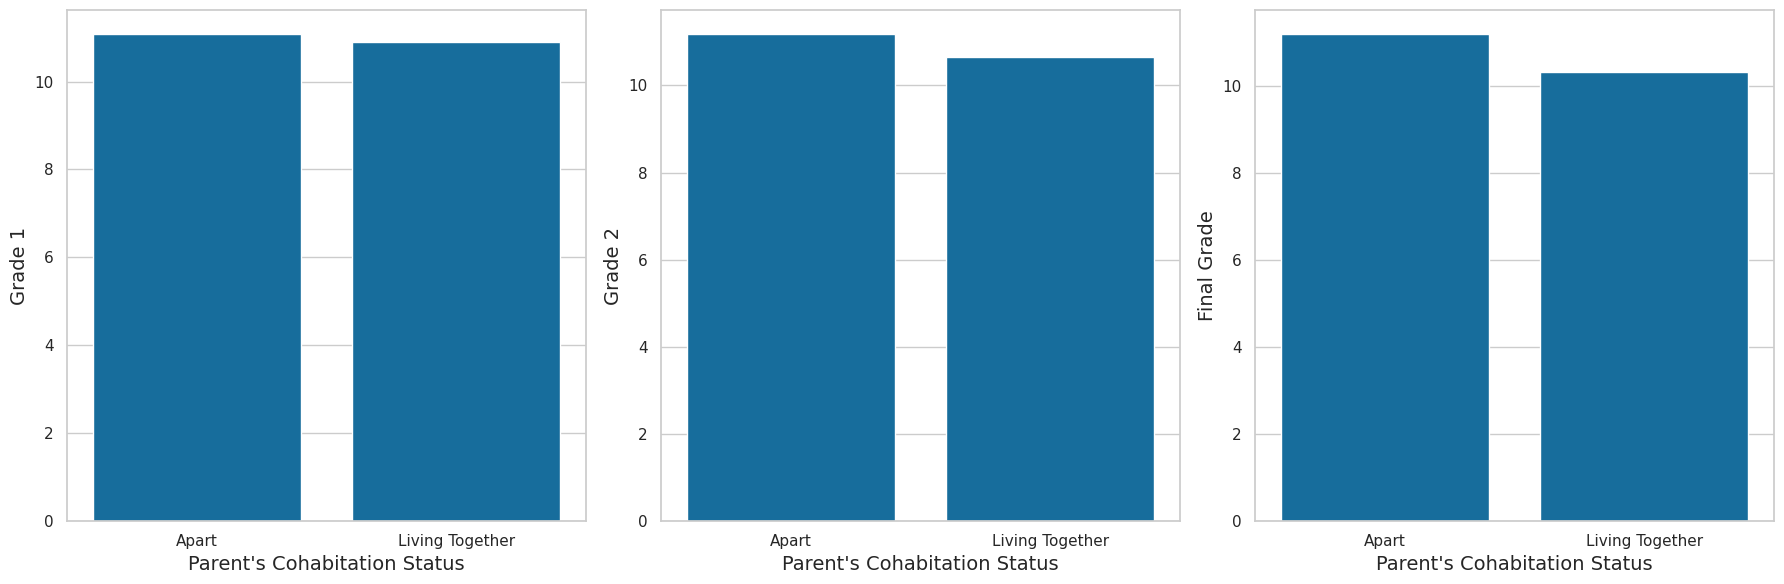

In [26]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=df['Pstatus'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Apart", "Living Together"])

# Grade 2 plot
b2 = sns.barplot(x=df['Pstatus'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Apart", "Living Together"])

# Final Grade plot
b3 = sns.barplot(x=df['Pstatus'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Apart", "Living Together"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note**: Students whose parent's cohabitation status is apart got better grades than who live together. Maybe because:
* Students whose parents live apart might receive increased attention and support from both parents, as they could be more focused on ensuring their child's success in school. This additional support and motivation can positively influence a student's performance.

* parents who live apart might have higher socioeconomic status, which could lead to better educational resources, tutoring, and opportunities for enrichment activities that contribute to improved academic performance.

### **How Does Father's Education Level Impact the Grades?**

<ipython-input-27-eb7af21a2995>:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


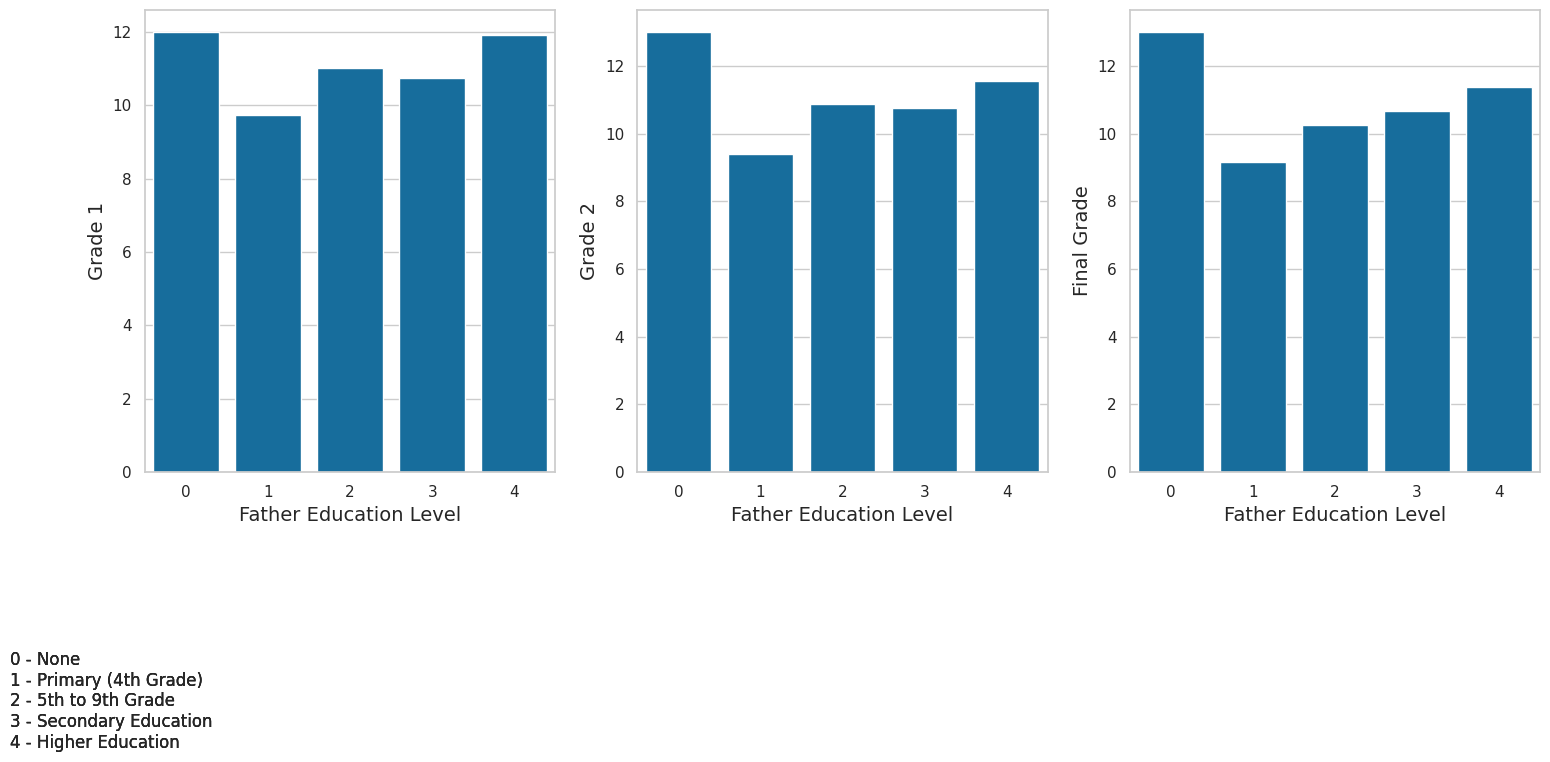

In [27]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
education_descriptions = [
    "0 - None",
    "1 - Primary (4th Grade)",
    "2 - 5th to 9th Grade",
    "3 - Secondary Education",
    "4 - Higher Education"
]
# Grade 1 plot
b1 = sns.barplot(x='Fedu', y='G1', data=df, ci=None, ax=axs[0])
b1.set_xlabel("Father Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(education_descriptions), fontsize=12, transform=plt.gcf().transFigure)

# Grade 2 plot
b2 = sns.barplot(x='Fedu', y='G2', data=df, ci=None, ax=axs[1])
b2.set_xlabel("Father Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(education_descriptions), fontsize=12, transform=plt.gcf().transFigure)

# Final Grade plot
b3 = sns.barplot(x='Fedu', y='G3', data=df, ci=None, ax=axs[2])
b3.set_xlabel("Father Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(education_descriptions), fontsize=12, transform=plt.gcf().transFigure)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note**: We can see that the students with uneducated fathers scores higher grades.
* Students with uneducated parents might be more motivated to excel academically to improve their own future prospects. This motivation could drive them to work harder and achieve higher grades.


### **How Does Mother's Education Level Impact the Grades?**

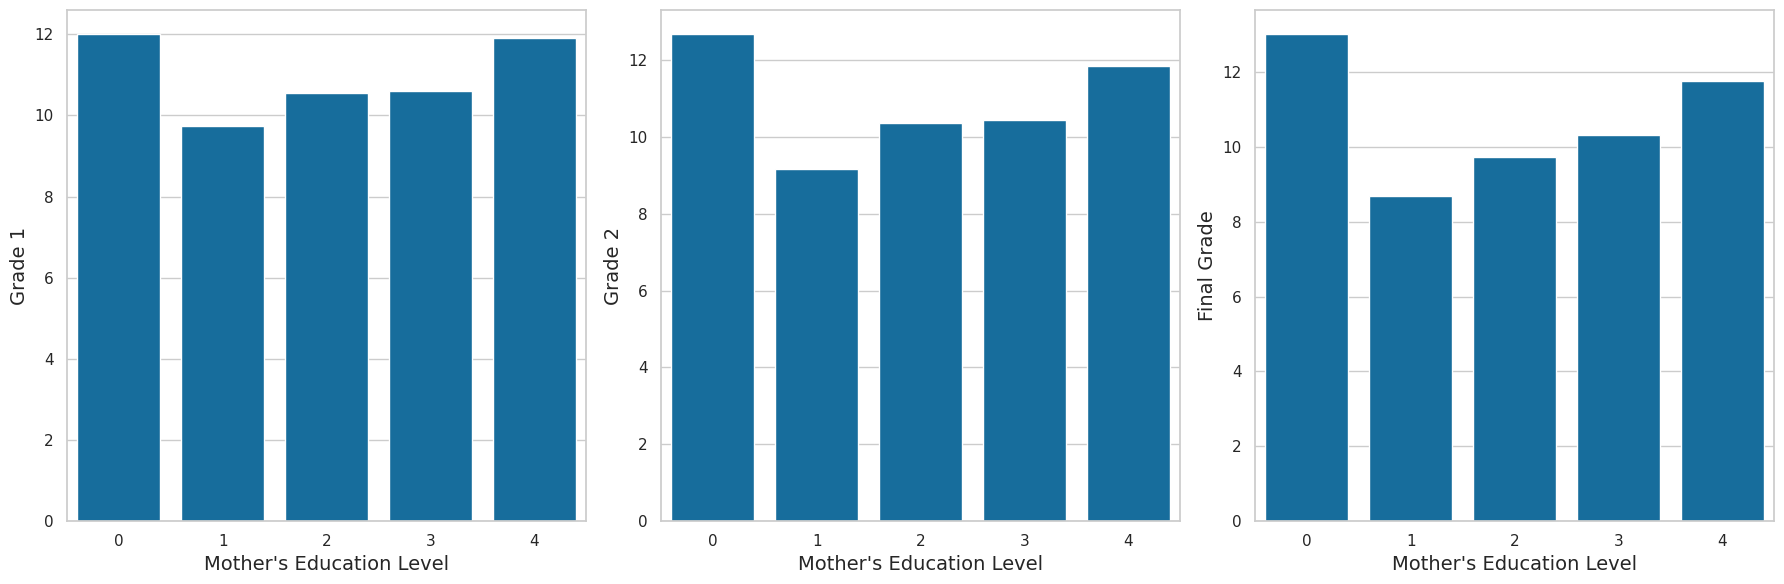

In [28]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=df['Medu'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel("Mother's Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=df['Medu'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel("Mother's Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x=df['Medu'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel("Mother's Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()



**Note**:We can see that the students with uneducated mothers got better grades. We can think that they force and motivates their children into studying.

### **The relation between father's and mother's Jobs and the grades**

<ipython-input-29-4a9a98433daa>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b1.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])
<ipython-input-29-4a9a98433daa>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  b2.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])
<ipython-input-29-4a9a98433daa>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  b3.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])


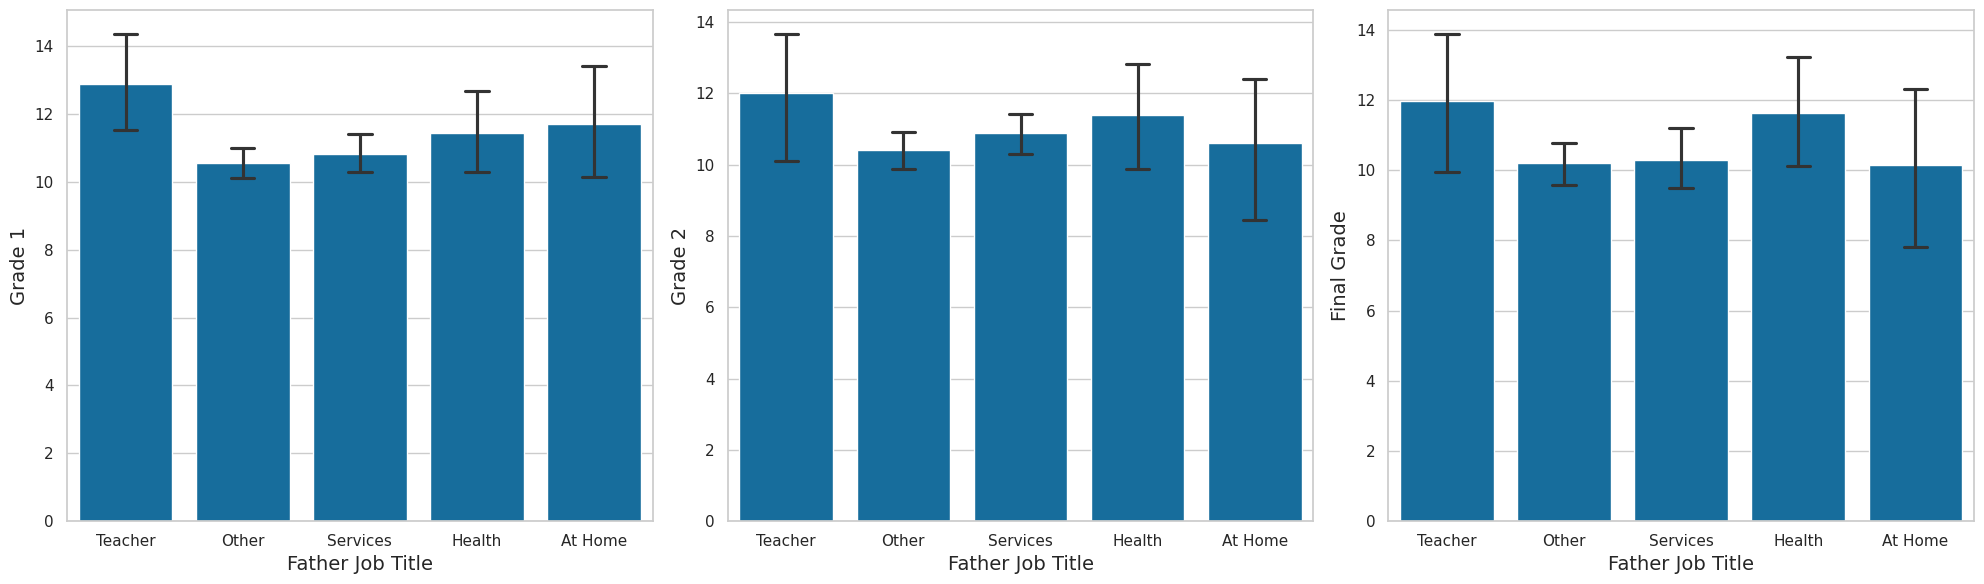

In [29]:

# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=df['Fjob'], y=df['G1'], data=df, ax=ax1, errcolor='0.2', capsize=0.2)
b1.set_xlabel('Father Job Title', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Plot the second chart
b2 = sns.barplot(x=df['Fjob'], y=df['G2'], data=df, ax=ax2, errcolor='0.2', capsize=0.2)
b2.set_xlabel('Father Job Title', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Plot the third chart
b3 = sns.barplot(x=df['Fjob'], y=df['G3'], data=df, ax=ax3, errcolor='0.2', capsize=0.2)
b3.set_xlabel('Father Job Title', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


**Note**: Students whose fathers are teachers and work in health got higher grades than the others, maybe because:
* Fathers who are teachers or work in the health field might value education highly and provide a supportive learning environment at home. They might have a better understanding of effective study techniques and be able to assist their children with their studies.

*  Families with fathers working in education or health might have more access to educational resources, such as books, tutoring, or online learning platforms. This access can contribute to better academic performance.

<ipython-input-30-df2ca65409f5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  b1.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])
<ipython-input-30-df2ca65409f5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  b2.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])
<ipython-input-30-df2ca65409f5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  b3.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])


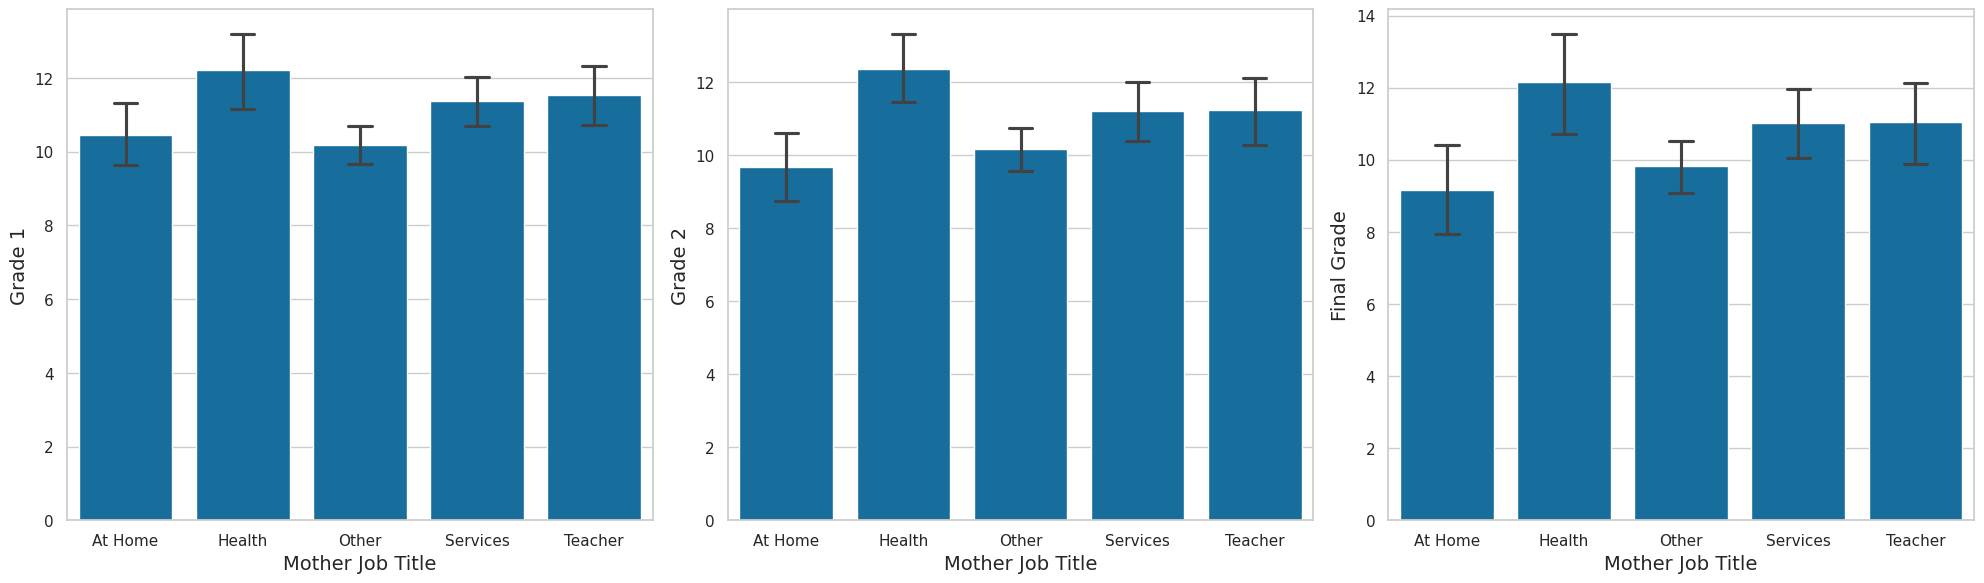

In [30]:
# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=df['Mjob'], y=df['G1'], data=df, ax=ax1, errcolor=None, capsize=0.2)
b1.set_xlabel('Mother Job Title', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Plot the second chart
b2 = sns.barplot(x=df['Mjob'], y=df['G2'], data=df, ax=ax2, errcolor=None, capsize=0.2)
b2.set_xlabel('Mother Job Title', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Plot the third chart
b3 = sns.barplot(x=df['Mjob'], y=df['G3'], data=df, ax=ax3, errcolor=None, capsize=0.2)
b3.set_xlabel('Mother Job Title', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


**Note**: Students whose mothers work in health got higher grades than the othersm maybe because :
* Mothers in health professions might create a supportive home environment that fosters learning. They might understand the importance of providing resources, guidance, and encouragement for their children's studies.

*  Mothers who work in health-related fields might highly value education and encourage their children to excel academically. This emphasis on learning can positively impact a student's study habits and motivation.

* Mothers working in health fields can serve as role models, inspiring their children to pursue education and career goals. The success and dedication of their mothers can influence their own aspirations.

### **What is the relation between the studey time and the final grade?**

<ipython-input-31-38ba0d7bc70f>:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


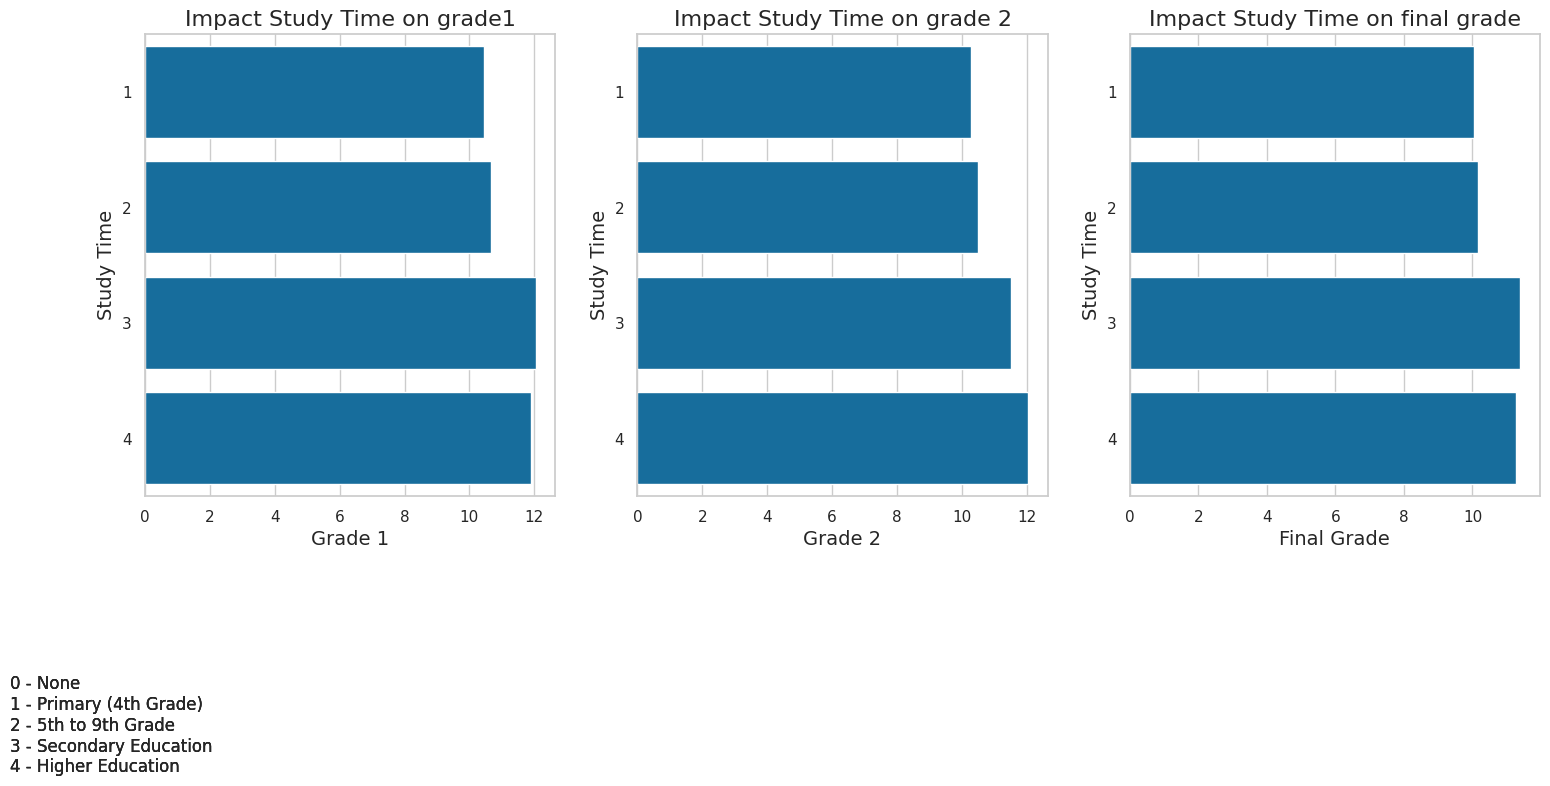

In [31]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
study_times = [
    "0 - None",
    "1 - Primary (4th Grade)",
    "2 - 5th to 9th Grade",
    "3 - Secondary Education",
    "4 - Higher Education"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x=df['G1'], y=df['studytime'], data=df, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Study Time', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.set_title('Impact Study Time on grade1', fontsize=16)
b1.text(0.05, -0.35, '\n'.join(study_times), fontsize=12, transform=plt.gcf().transFigure)

# Create the second horizontal bar plot
b2 = sns.barplot(x=df['G2'], y=df['studytime'], data=df, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Study Time', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.set_title('Impact Study Time on grade 2', fontsize=16)
b2.text(0.05, -0.35, '\n'.join(study_times), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x=df['G3'], y=df['studytime'], data=df, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Study Time', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.set_title('Impact Study Time on final grade', fontsize=16)
b3.text(0.05, -0.35, '\n'.join(study_times), fontsize=12, transform=plt.gcf().transFigure)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Note**: Students who studies 5 to 10 hours and more got higher grades.
* In many cases, students who spend more time studying tend to earn higher grades. This is because studying allows students to review and reinforce the material, gain a deeper understanding of the subject matter, and perform better on assessments.

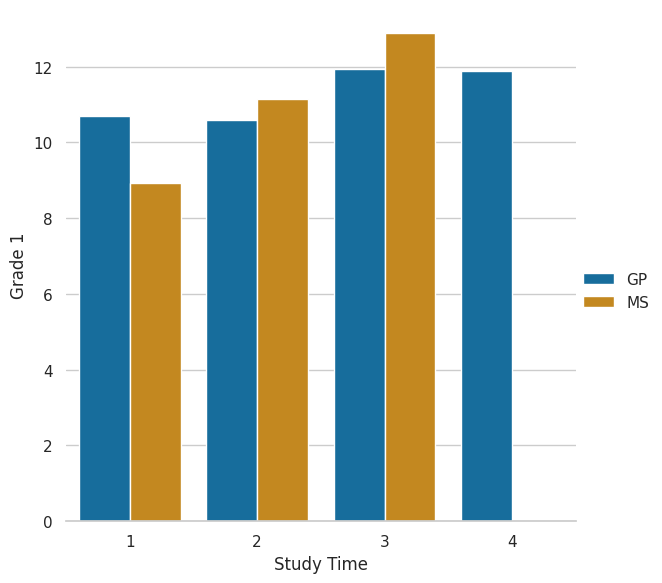

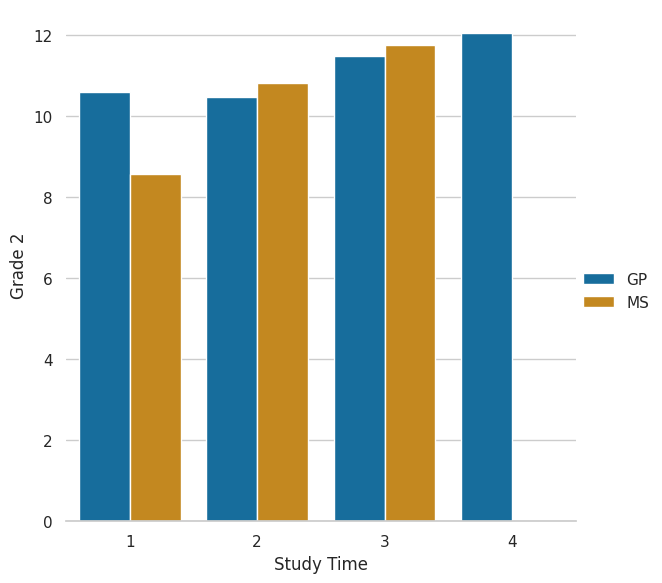

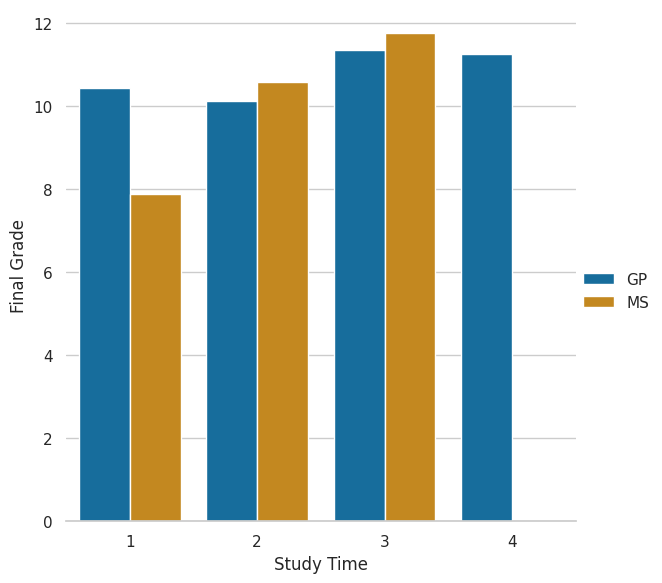

In [32]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="studytime", y="G1", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
g.set_axis_labels("Study Time", "Grade 1")
g.legend.set_title("")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="studytime", y="G2", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
g.set_axis_labels("Study Time", "Grade 2")
g.legend.set_title("")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="studytime", y="G3", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
g.set_axis_labels("Study Time", "Final Grade")
g.legend.set_title("")




**Note**: students in both schools as they study more time, they get higher grades.

### **What is the realation between the gardian and the grade.**

<ipython-input-33-747fdb143909>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(custom_xtitles)
<ipython-input-33-747fdb143909>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  b2.set_xticklabels(custom_xtitles)
<ipython-input-33-747fdb143909>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  b3.set_xticklabels(custom_xtitles)


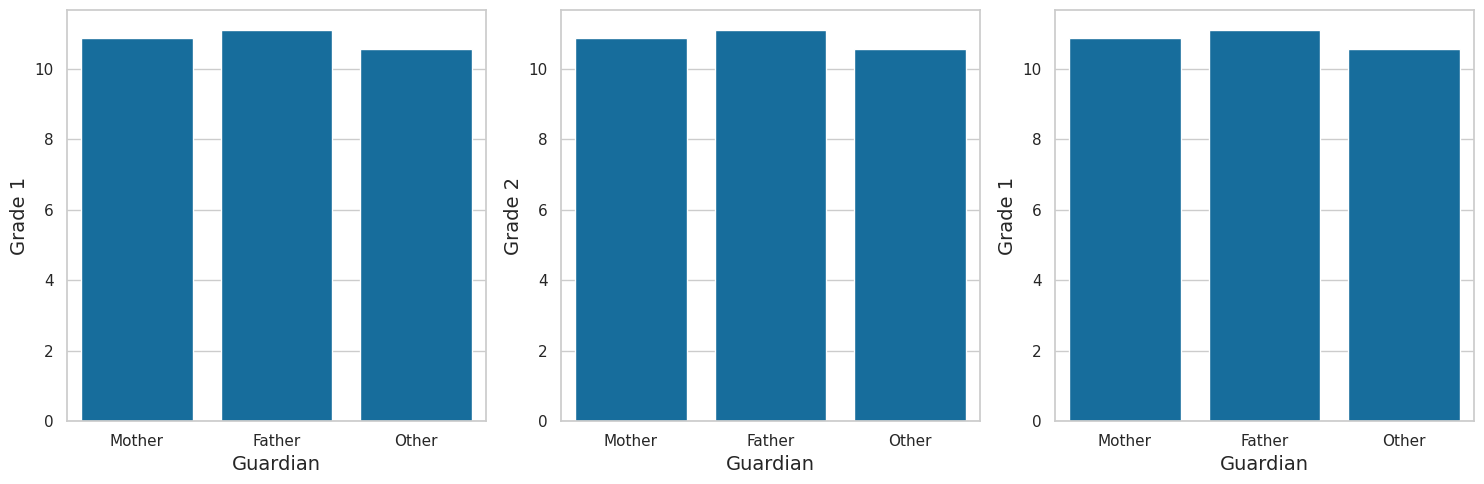

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['guardian'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Guardian', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Mother", "Father", "Other"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)

# Plot the second chart
b2 = sns.barplot(x=df['guardian'], y=df['G1'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Guardian', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles)

# Plot the third chart
b3 = sns.barplot(x=df['guardian'], y=df['G1'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Guardian', fontsize=14)
b3.set_ylabel('Grade 1', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: The students with their fathers or mother as guardians got higher grades.

* **Fathers** can serve as role models for their children, demonstrating the value of education through their own actions and attitudes towards learning.
* **Mothers** often play a central role in a child's early cognitive and social development. Engaging in educational activities and providing a nurturing environment can stimulate a child's curiosity and readiness for school.

### **What is the relation between the extra educational support(schoolsup) and the grades?**

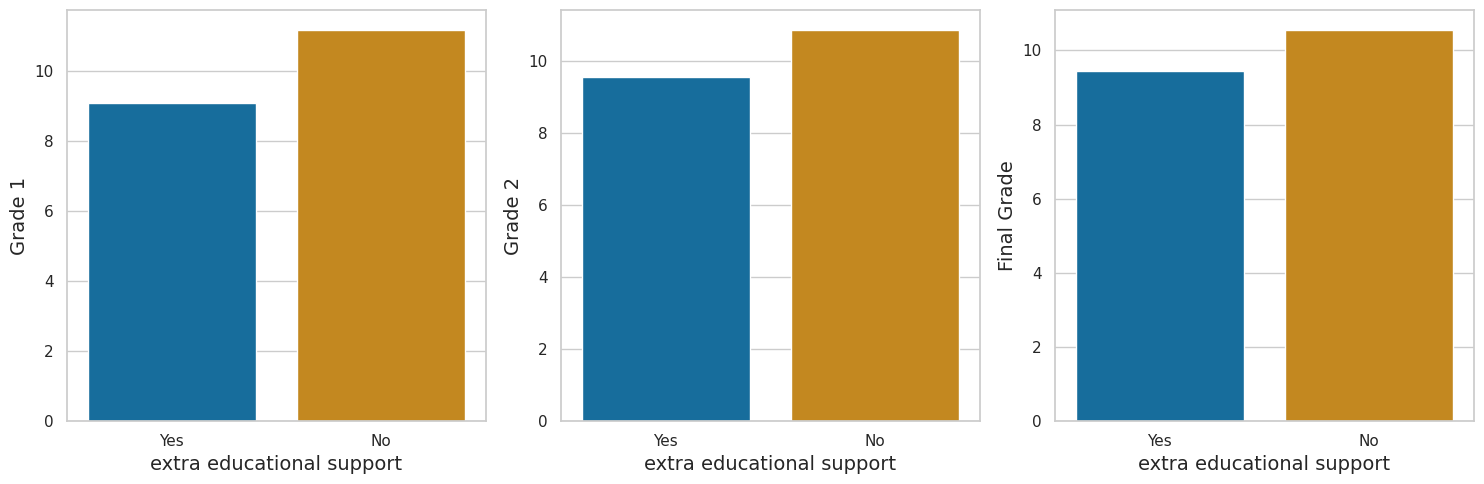

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['schoolsup'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('extra educational support', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Yes", "No"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)

# Plot the second chart
b2 = sns.barplot(x=df['schoolsup'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('extra educational support', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles)

# Plot the third chart
b3 = sns.barplot(x=df['schoolsup'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('extra educational support', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: Students who doesn't take extra educational support got better grades than others period.

### **What is the relationship between family educational support and grades?**

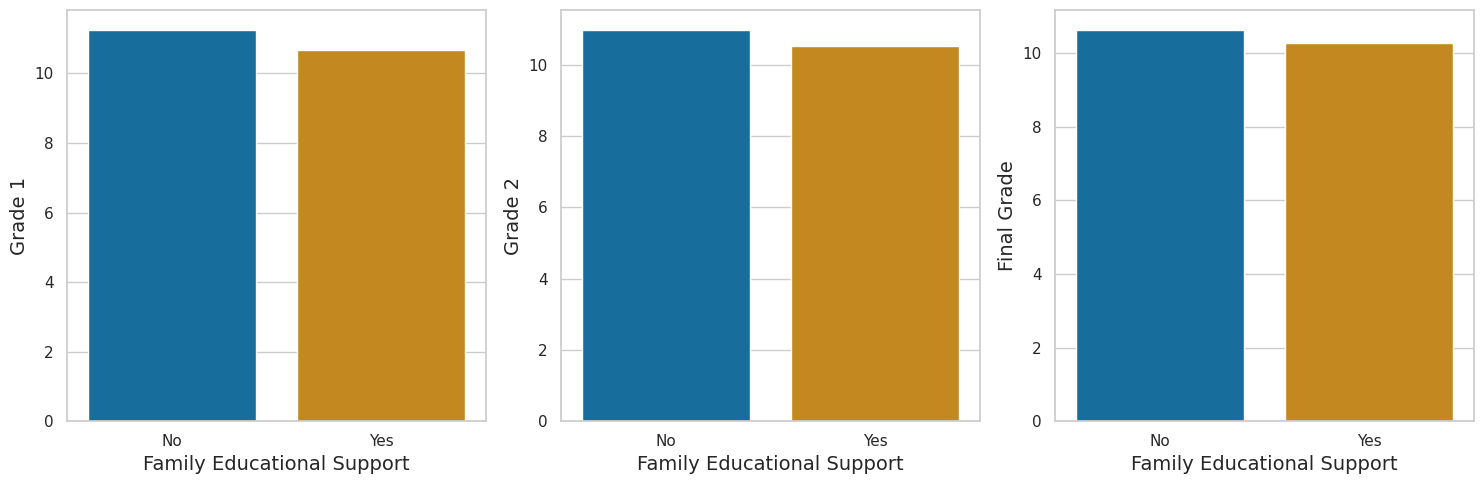

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['famsup'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Family Educational Support', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["No", "Yes"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)

# Plot the second chart
b1 = sns.barplot(x=df['famsup'], y=df['G2'], data=df, ci=None, ax=axes[1])
b1.set_xlabel('Family Educational Support', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles)

# Plot the third chart
b3 = sns.barplot(x=df['famsup'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Family Educational Support', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: We note that there is no big difference between students who have family educational support or not.


### **What is the relation between extra paid classes and grades?**

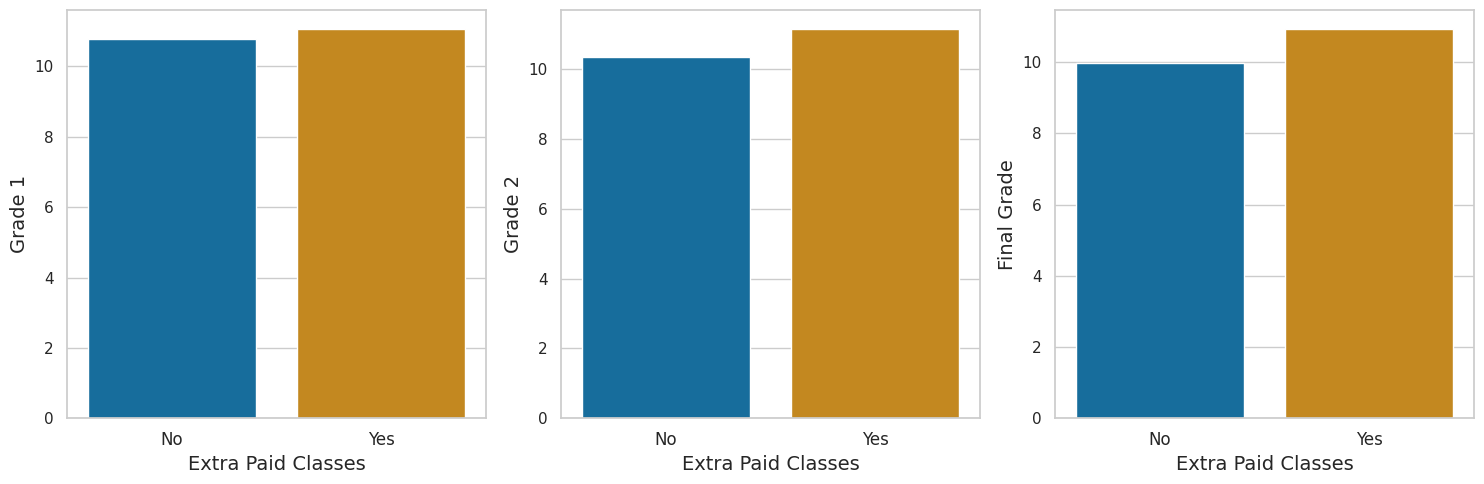

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['paid'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Extra Paid Classes', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["No", "Yes"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b1 = sns.barplot(x=df['paid'], y=df['G2'], data=df, ci=None, ax=axes[1])
b1.set_xlabel('Extra Paid Classes', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['paid'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Extra Paid Classes', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: We can see that students who takes extra paid classes got higher grades.

### **Does the activates effect on the students grades?**

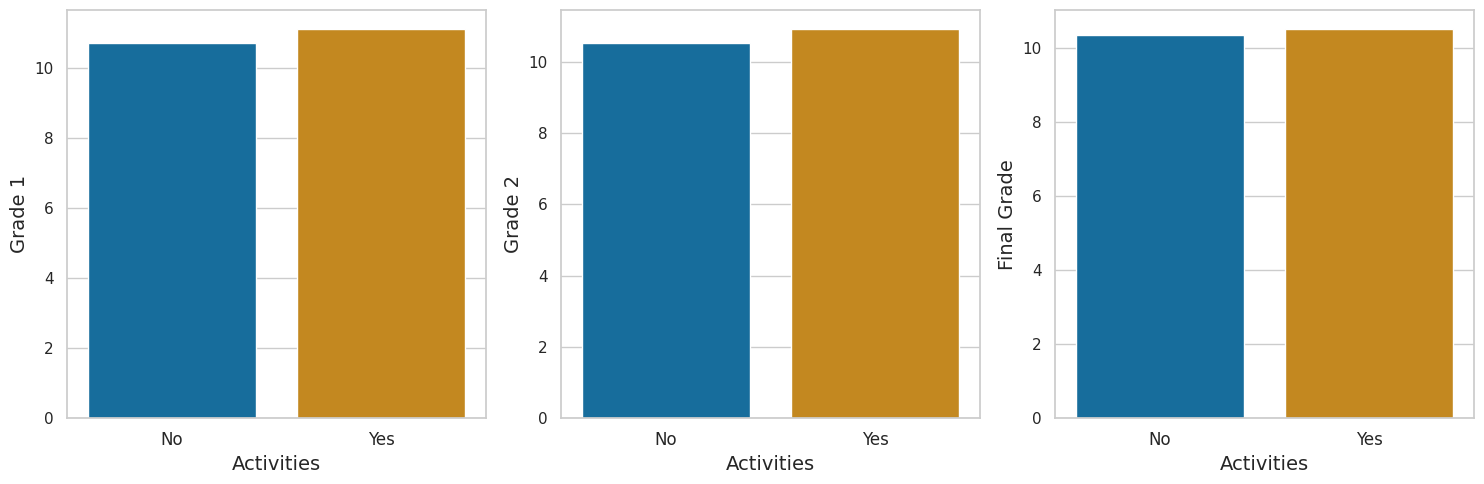

In [ ]:

# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['activities'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Activities', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["No", "Yes"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b1 = sns.barplot(x=df['activities'], y=df['G2'], data=df, ci=None, ax=axes[1])
b1.set_xlabel('Activities', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['activities'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Activities', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: There is no big difference between the student who participate in the activities and who is not.

### **What is the relationship between the nursery and grades?**

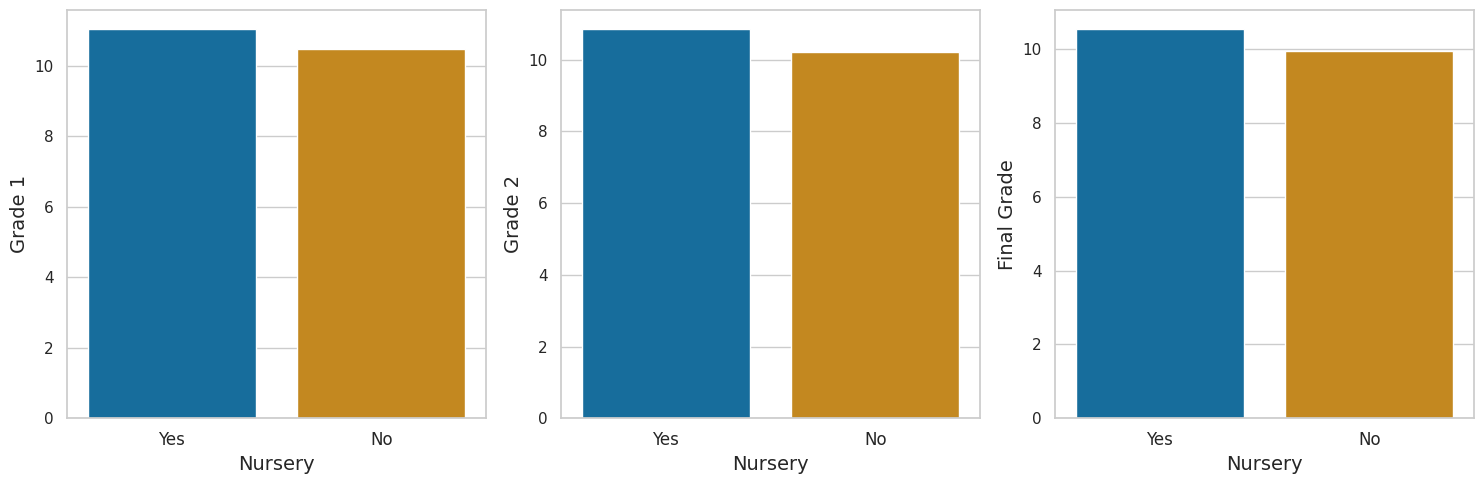

In [ ]:

# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x='nursery', y='G1', data=df, ci=None, ax=axes[0])
b.set_xlabel('Nursery', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Yes", "No"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b1 = sns.barplot(x='nursery', y='G2', data=df, ci=None, ax=axes[1])
b1.set_xlabel('Nursery', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b2 = sns.barplot(x='nursery', y='G3', data=df, ci=None, ax=axes[2])
b2.set_xlabel('Nursery', fontsize=14)
b2.set_ylabel('Final Grade', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: the students who attended the nursery got higher grades than others.

### **Does the students how want to take higher education(take higher education) get better grades?**

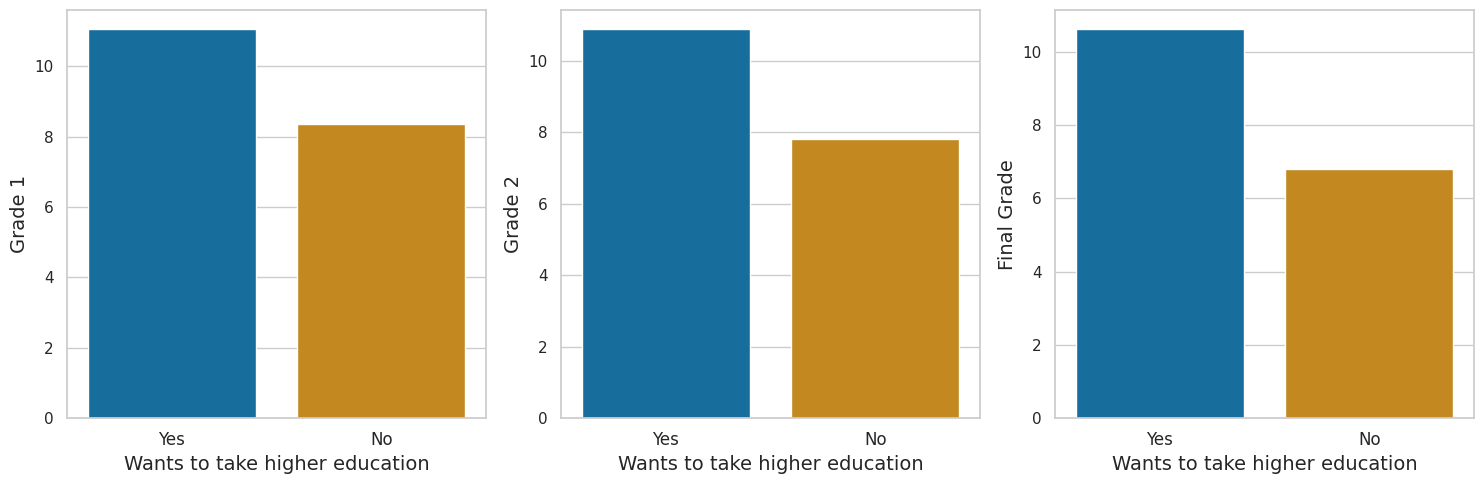

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Labels for 'higher' variable
custom_xtitles = ["Yes", "No"]

# Plot the first chart
b1 = sns.barplot(x=df['higher'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Wants to take higher education', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b2 = sns.barplot(x=df['higher'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Wants to take higher education', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['higher'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Wants to take higher education', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: We can see the students who want to take higher education got higher grades, because of:
* Motivation: Students who aspire to attend higher education might be more motivated to excel academically. Their goal of entering college or university can drive them to work harder and strive for better grades.

* Long-Term Perspective: Having a higher education goal encourages students to think long-term about their academic performance. They might recognize that strong grades are essential for admission to colleges and universities.

* Study Habits: Aspiring higher education students might develop effective study habits, time management skills, and organizational techniques that contribute to better academic outcomes.

* Goal Clarity: Setting a goal to attend higher education provides clarity on the path students need to take. This clarity can lead to focused efforts in their studies.
* etc...

### **Does the studens who have access to the insternet got better grades?**

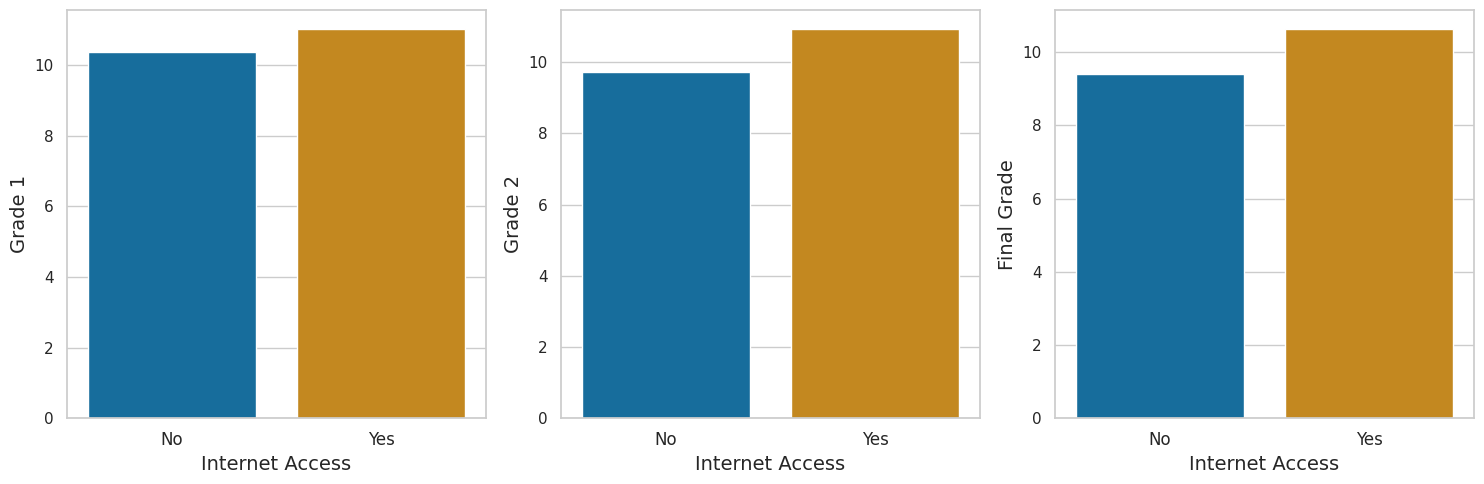

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Labels for 'internet' variable
custom_xtitles = ["No", "Yes"]

# Plot the first chart
b1 = sns.barplot(x=df['internet'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Internet Access', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b2 = sns.barplot(x=df['internet'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Internet Access', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['internet'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Internet Access', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: Students who uses the internet got higher grades,maybe because of:
* Access to Information: The internet provides a vast amount of information and resources that can supplement a student's learning. Those who effectively use online resources might have a broader understanding of subjects, leading to higher grades.

* Online Learning: The internet offers various online learning platforms and tutorials that can supplement classroom instruction. Engaging with these resources can lead to a deeper understanding of topics.

### What is the relationship of students with romantic relationships and the grades?

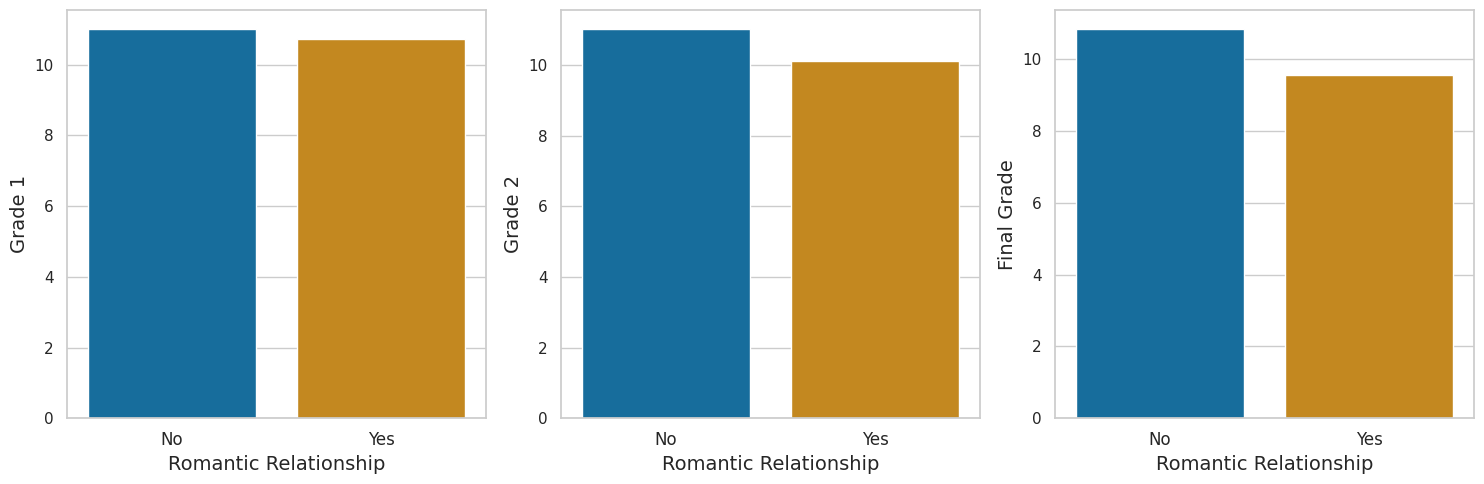

In [ ]:

# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Labels for 'romantic' variable
custom_xtitles = ["No", "Yes"]

# Plot the first chart
b1 = sns.barplot(x=df['romantic'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Romantic Relationship', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b2 = sns.barplot(x=df['romantic'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Romantic Relationship', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['romantic'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Romantic Relationship', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

**Note**: the student with romantic relationships got lower grades than who have not a romantic relationship.(We don't need to explain why)

### **The relation between numerical attributes (Heatmap)**

<Axes: >

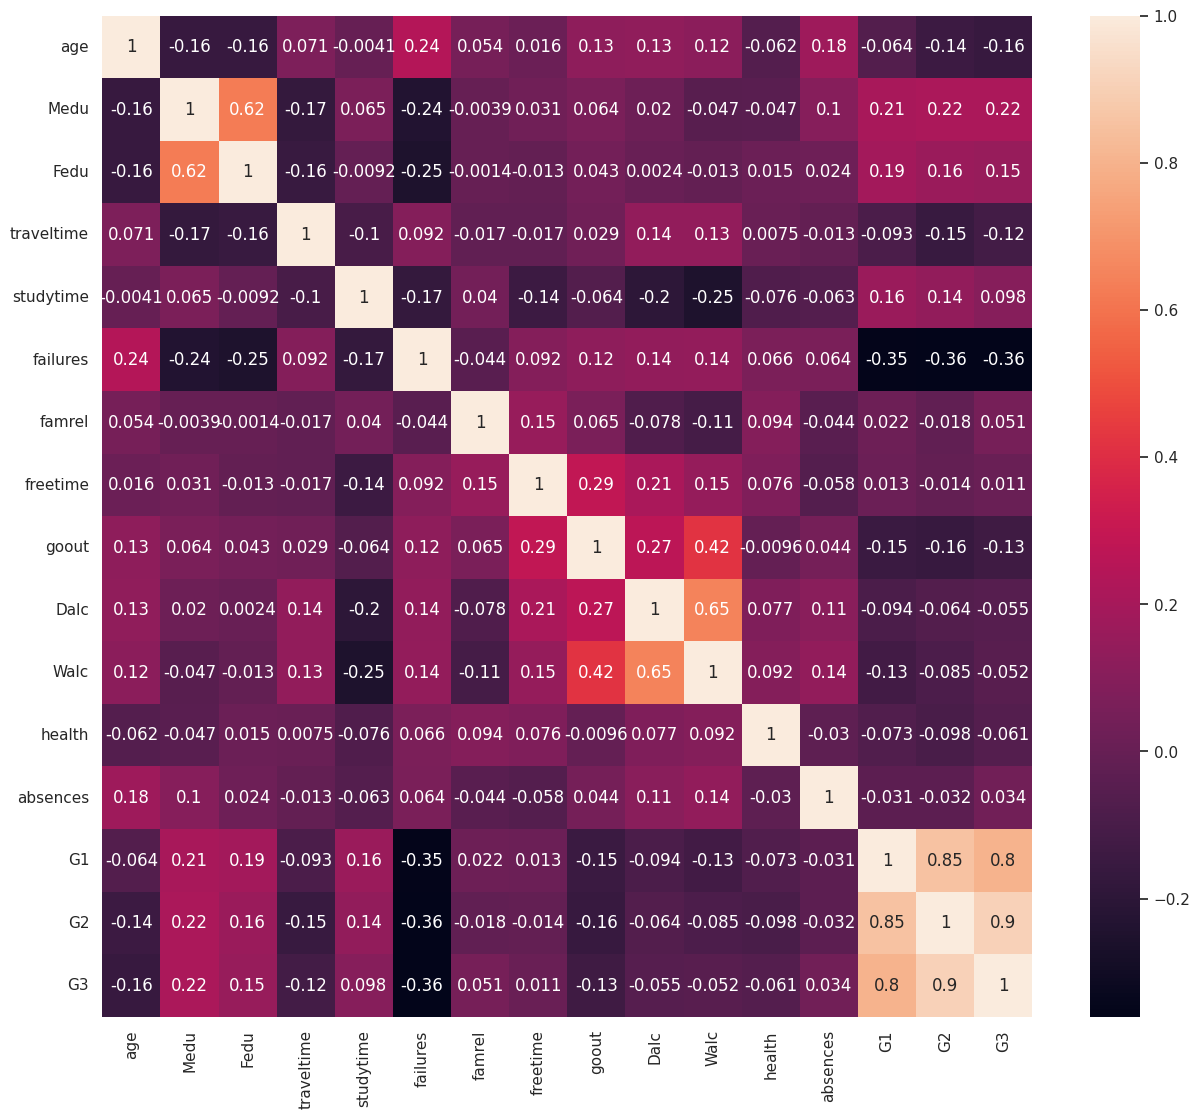

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True,cbar=True)

**Note**:We can see that G1,G2,medu,fedu and failuers have strong correlation.

### **Does the failures effect on the student grades?**

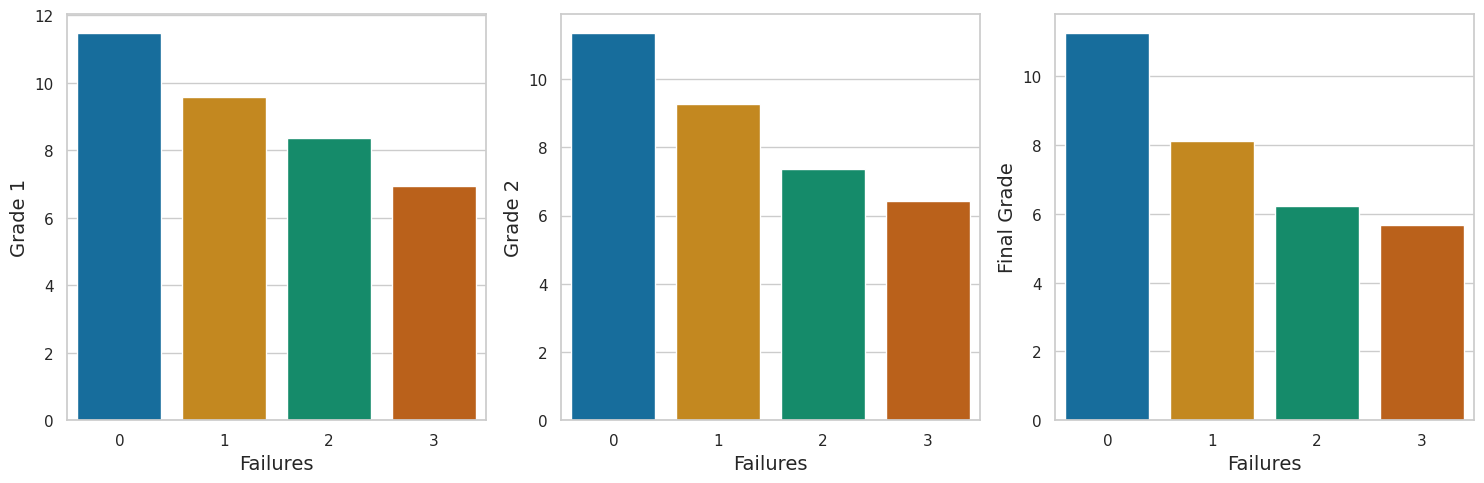

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart for 'G1'
b1 = sns.barplot(x=df['failures'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Failures', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Plot the second chart for 'G2'
b2 = sns.barplot(x=df['failures'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Failures', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Plot the third chart for 'G3'
b3 = sns.barplot(x=df['failures'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Failures', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Note**: The final grade goes down as the failures increases.

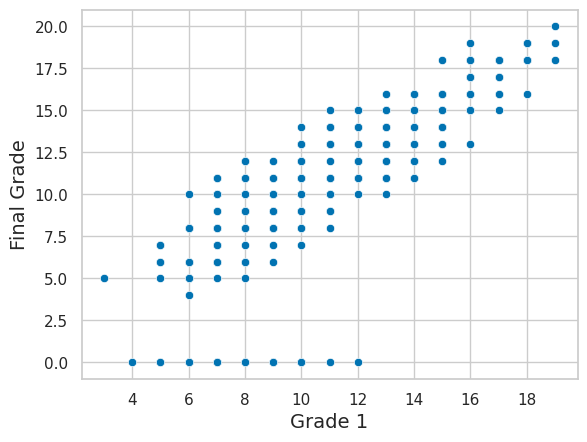

In [ ]:
b= sns.scatterplot(x=df['G1'],y=df['G3'],data=df)
b.set_xlabel('Grade 1', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()


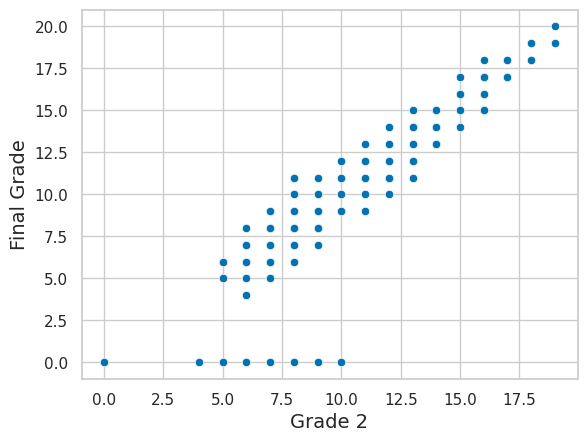

In [ ]:
b= sns.scatterplot(x=df['G2'],y=df['G3'],data=df)
b.set_xlabel('Grade 2', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

**Note**: we can see that as G1 and G2 increase, the final grade increases.

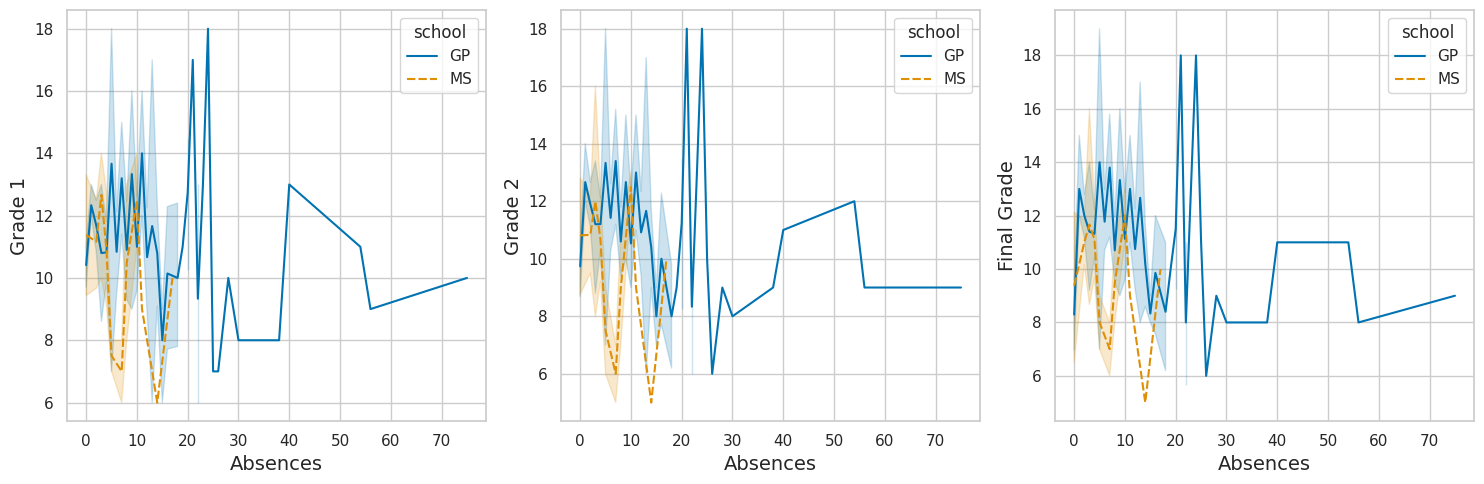

In [ ]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart for 'G1'
b1 = sns.lineplot(x='absences', y='G1', hue='school', style='school', data=df, ax=axes[0])
b1.set_xlabel('Absences', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Plot the second chart for 'G2'
b2 = sns.lineplot(x='absences', y='G2', hue='school', style='school', data=df, ax=axes[1])
b2.set_xlabel('Absences', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Plot the third chart for 'G3'
b3 = sns.lineplot(x='absences', y='G3', hue='school', style='school', data=df, ax=axes[2])
b3.set_xlabel('Absences', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Notes**:
* The Students of GP who were absent for around 20-24 days, tends to do better on exam.
* Students of MS who were absent for around 3 days or 10 days, tends to do better on exam.

## **Data Peprocessing**

### **Clean data**

* **Drop rows that have G3 less than 1**.

Filter out records with negative or zero values for 'G3'.

In [ ]:
df.drop(df[df['G3'] < 1].index, inplace = True)

### **Encoding categorical data**


#### **One hot Encoding**

The dataset contains nominal categorical data, making one-hot encoding the most suitable technique for data representation.

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

### **Feature selection**

Find the correlation between "G3" and all other columns in the one-hot encoded DataFrame.

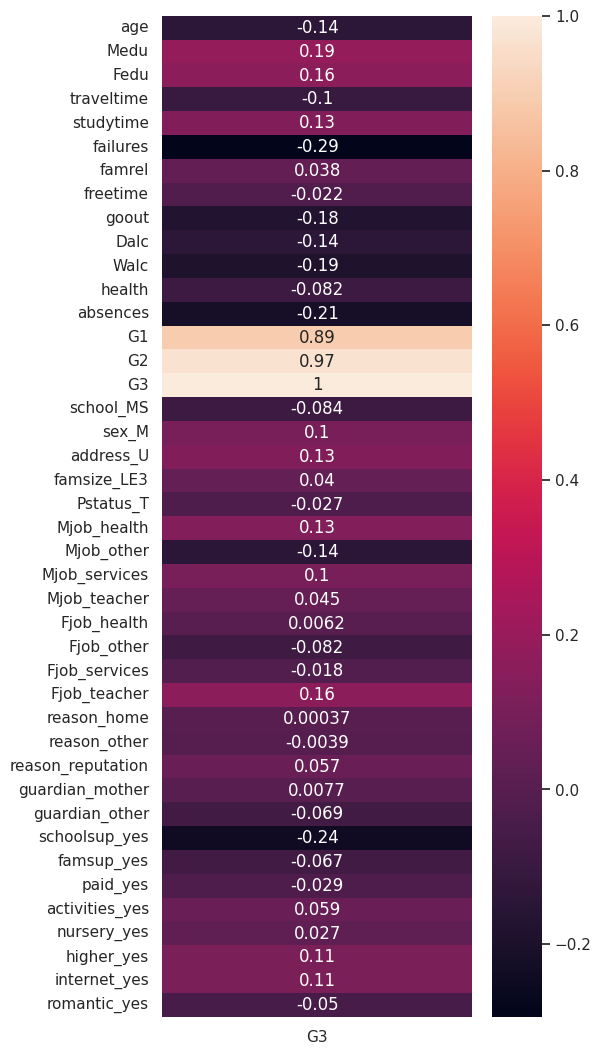

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True)
plt.show()

**Note**: We can observe that certain features underwent changes in correlation following the encoding process.

**Note**: Interest in (goout, Dlac, walc)

* **Go Out Effect on Grades**

<ipython-input-51-f8ee02f535e7>:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


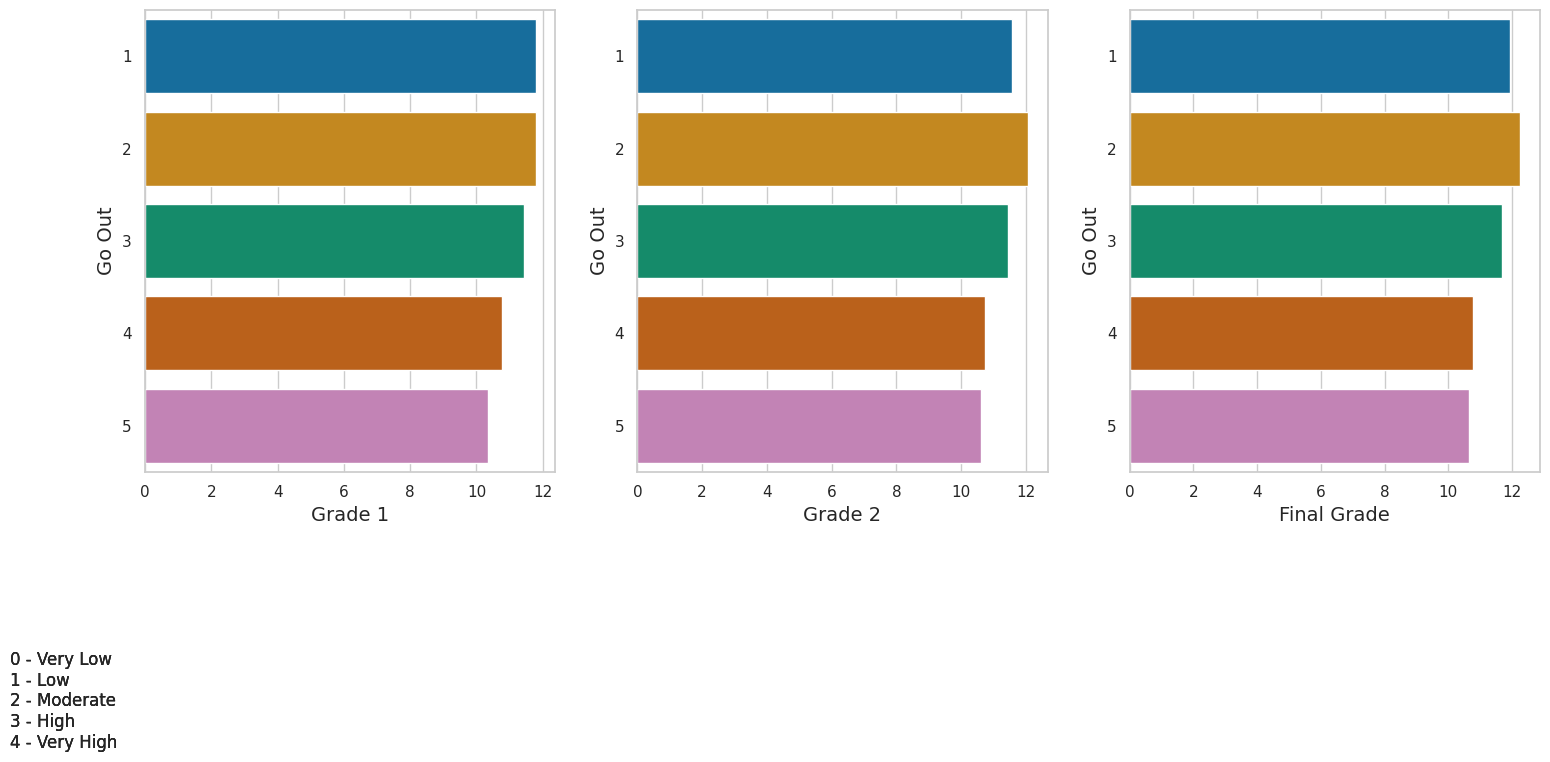

In [ ]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bars = [
    "0 - Very Low",
    "1 - Low",
    "2 - Moderate",
    "3 - High",
    "4 - Very High"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x='G1', y='goout', data=df_ohe, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Go Out', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)

# Create the second horizontal bar plot
b2 = sns.barplot(x=df['G2'], y=df['goout'], data=df, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Go Out', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x='G3', y='goout', data=df_ohe, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Go Out', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* **Weekend Alcohol(Walc) Effect On Grades**

<ipython-input-52-81fcc55afbaf>:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


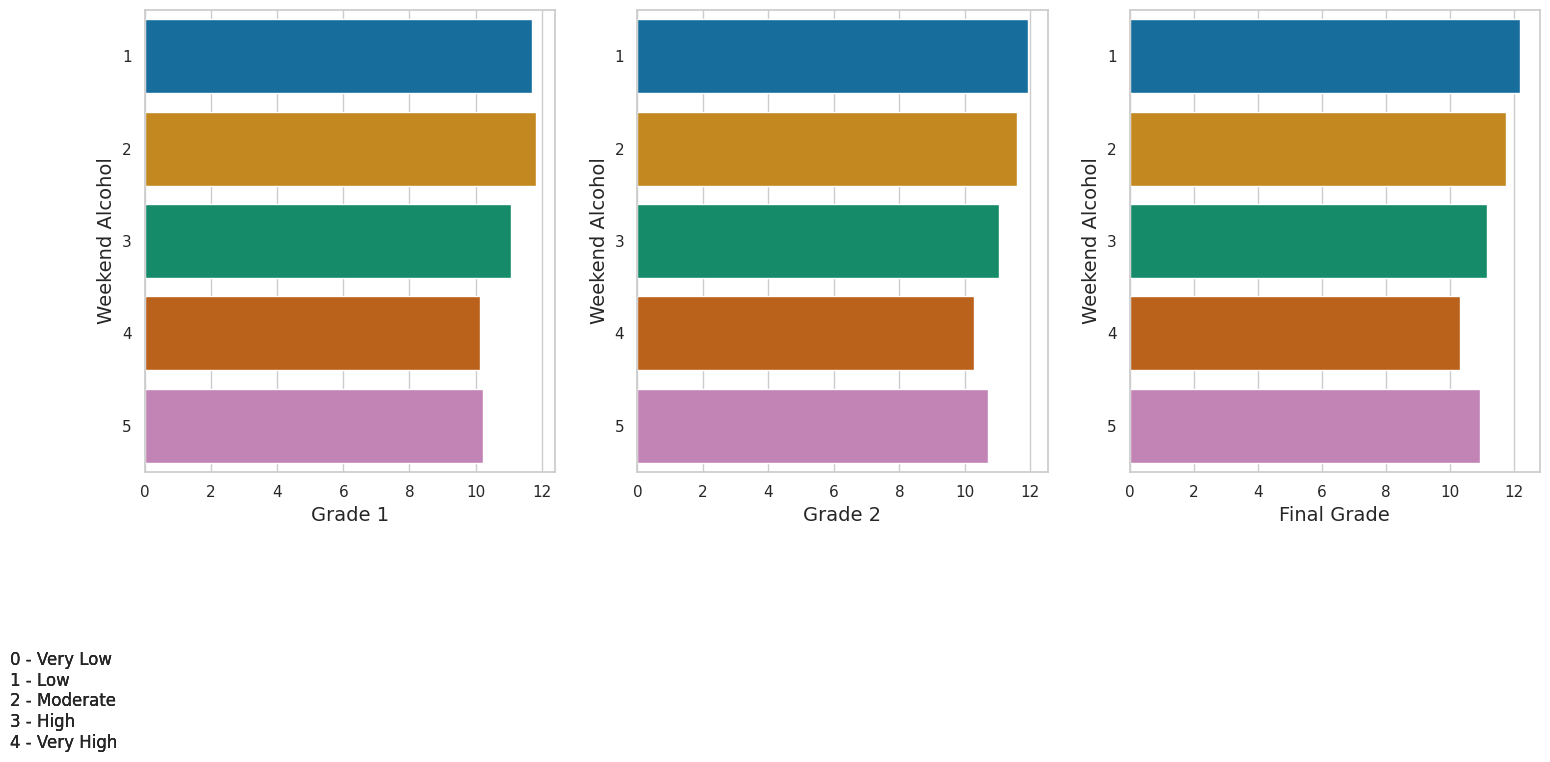

In [ ]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bars = [
    "0 - Very Low",
    "1 - Low",
    "2 - Moderate",
    "3 - High",
    "4 - Very High"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x='G1', y='Walc', data=df_ohe, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Weekend Alcohol', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)

# Create the second horizontal bar plot
b2 = sns.barplot(x='G2', y='Walc', data=df_ohe, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Weekend Alcohol', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x='G3', y='Walc', data=df_ohe, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Weekend Alcohol', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Workday Alcohol(Dalc) Effect on Grades**

<ipython-input-53-5f1cbba34b16>:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


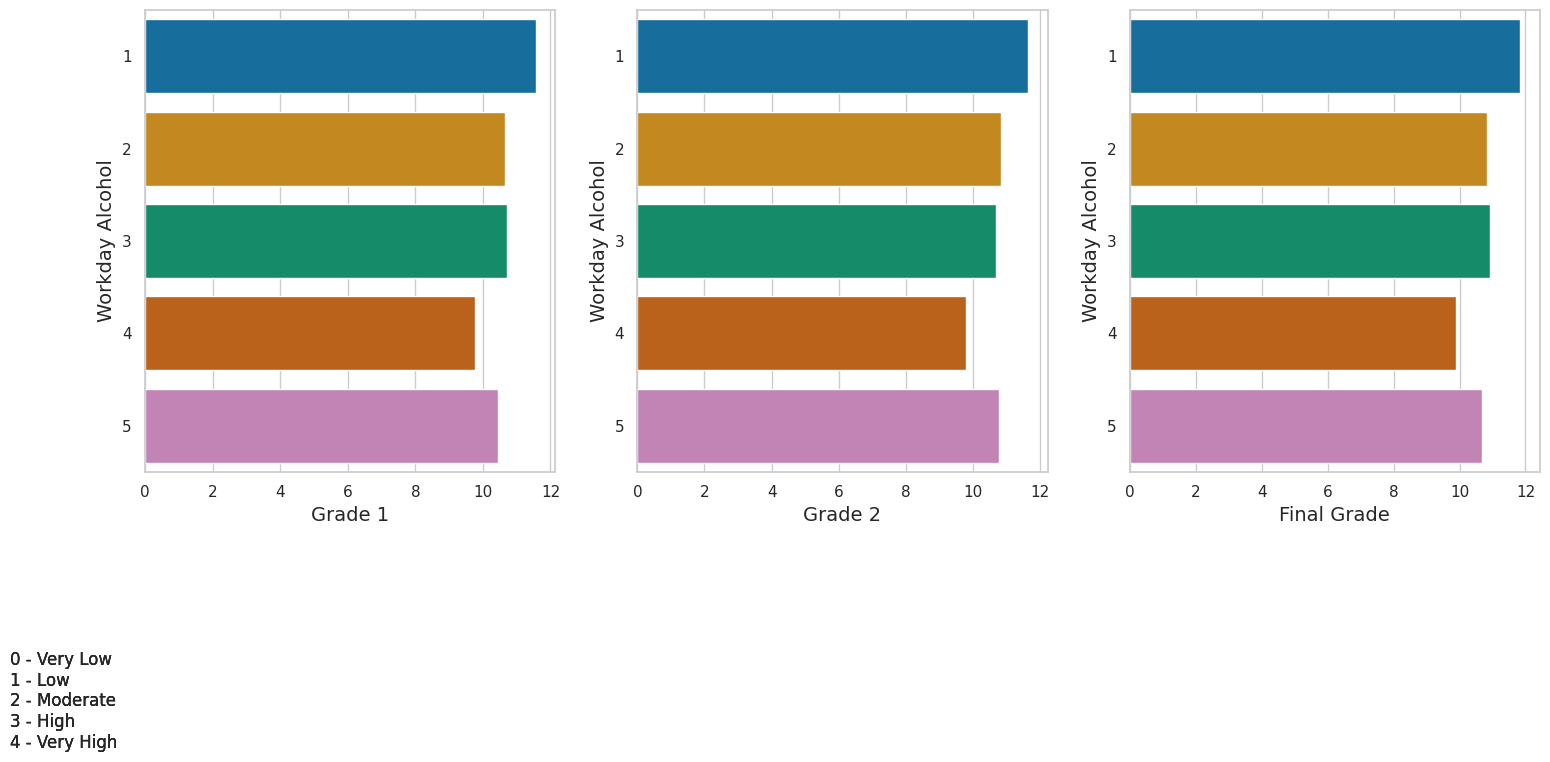

In [ ]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bars = [
    "0 - Very Low",
    "1 - Low",
    "2 - Moderate",
    "3 - High",
    "4 - Very High"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x='G1', y='Dalc', data=df_ohe, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Workday Alcohol', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)

# Create the second horizontal bar plot
b2 = sns.barplot(x='G2', y='Dalc', data=df_ohe, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Workday Alcohol', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x='G3', y='Dalc', data=df_ohe, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Workday Alcohol', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Note**: Filtering out features that have a low linear correlation (less than 0.13) with the "G3" column. because Removing low-correlation features can help improve the efficiency and effectiveness of machine learning models by reducing noise in the data and potentially speeding up training.

In [ ]:
THRESHOLD = 0.13

In [ ]:
G3_corr = df_ohe.corr()["G3"]

In [ ]:
df_ohe_after_drop_features = df_ohe.copy()

In [ ]:
for key, value in G3_corr.iteritems():
  if abs(value) < THRESHOLD:
    df_ohe_after_drop_features.drop(columns= key, inplace=True)

* **Note**: We are excluding the "age" feature due to its inconsistent data.

In [ ]:
df_ohe_after_drop_features.drop(columns=["age"], axis=1, inplace=True)

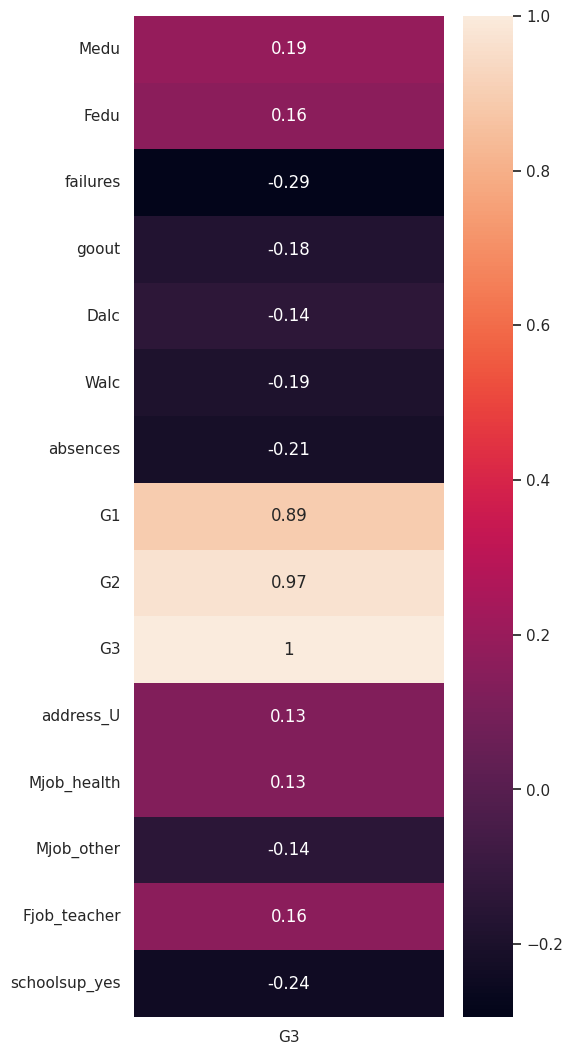

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe_after_drop_features.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True)
plt.show()

* Splitting the dataset into input features (X) and the target variable (y).
Specifically, separates the DataFrame `df_ohe_after_drop_features` into two parts:

  * `X`: Contains the input features used for training a machine learning model. It includes all columns except the 'G3' column.

  * `y`: Represents the target variable, which is the 'G3' column. This column holds the values you want to predict or model.

In [ ]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3']

* Displaying the first five rows after the featue selection.

In [ ]:
df_ohe_after_drop_features.head()

Medu  Fedu  failures  goout  Dalc  Walc  absences  G1  G2  G3  address_U  \
0     4     4         0      4     1     1         6   5   6   6          1   
1     1     1         0      3     1     1         4   5   5   6          1   
2     1     1         3      2     2     3        10   7   8  10          1   
3     4     2         0      2     1     1         2  15  14  15          1   
4     3     3         0      2     1     2         4   6  10  10          1   

   Mjob_health  Mjob_other  Fjob_teacher  schoolsup_yes  
0            0           0             1              1  
1            0           0             0              0  
2            0           0             0              1  
3            1           0             0              0  
4            0           1             0              0

* Splitting the dataset into input features (X) and the target variable (y).
Specifically, separates the DataFrame `df_ohe` (all features) into two parts:
  - `X_all_features_except_G3`: Contains the input features used for training a machine learning model. It includes all columns except the 'G3' column.
  - `y_G3`: Represents the target variable, which is the 'G3' column. This column holds the values you want to predict or model.

In [ ]:
X_all_features_except_G3 = df_ohe.drop('G3',axis = 1)
y_G3 = df_ohe ['G3']

## **Training Models**

### 1. **Regression Model**


In [ ]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LinearRegression()
    model2 = BayesianRidge()
    model3 = RandomForestRegressor()
    model4 = GradientBoostingRegressor()
    model5 = DecisionTreeRegressor()
    model6 = Ridge()
    model7 = Lasso()

    models = [model1, model2, model3, model4, model5, model6, model7 ]
    model_name_list = ['LinearRegression', 'BayesianRidge', 'RandomForestRegressor', 'GradientBoostingRegressor',
           'DecisionTreeRegressor', 'Ridge', 'Lasso']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by cross validation', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rmse_cross_val ,mse,r_squared ]

    return results

#### **Train models for first data group (data after feature select**ion)

In [ ]:
train_regression_model(X, y)

MAE      RMSE RMSE by cross validation  \
LinearRegression           0.485933  0.715841                 1.072476   
BayesianRidge                0.4842  0.711592                 0.836028   
RandomForestRegressor      0.611667  0.905235                 1.180354   
GradientBoostingRegressor   0.64514  0.881087                 1.141548   
DecisionTreeRegressor      0.888889   1.20185                 1.341641   
Ridge                      0.485829  0.715395                 0.890409   
Lasso                      0.559807  0.771662                  0.88177   

                                MSE       R^2  
LinearRegression           0.512429  0.947704  
BayesianRidge              0.506363  0.948323  
RandomForestRegressor       0.81945  0.916371  
GradientBoostingRegressor  0.776314  0.920773  
DecisionTreeRegressor      1.444444  0.852587  
Ridge                       0.51179  0.947769  
Lasso                      0.595462   0.93923

**Note**: From above table, **BayesianRidge** model is the best model

* Implementing the best model(**Bayesian Ridge model**)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

best_model1 = BayesianRidge()
best_model1.fit(X_train, y_train)

y_test_pred = best_model1.predict(X_test)

* Visualizing The Results


Text(0, 0.5, 'Predicted')

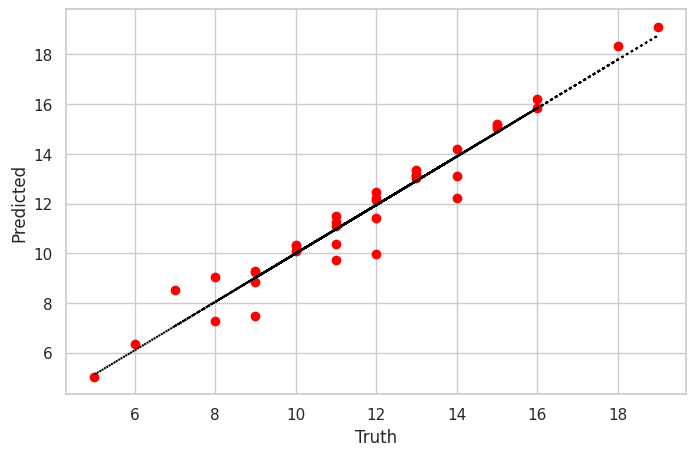

In [ ]:
n,m=polyfit(y_test, y_test_pred, 1)
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = y_test_pred, c="red")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")

plt.xlabel("Truth")
plt.ylabel("Predicted")

* **Saveing** The model as pkl file.

In [ ]:
with open('reg_model.pkl', 'wb') as file:
    pickle.dump(best_model1, file)

#### Train models for second data group (all features)

In [ ]:
train_regression_model(X_all_features_except_G3, y_G3)

MAE      RMSE RMSE by cross validation  \
LinearRegression           0.577762   0.84658                 1.004494   
BayesianRidge              0.532743  0.766342                 0.704171   
RandomForestRegressor      0.536944  0.815586                 1.224504   
GradientBoostingRegressor   0.66203   0.91045                 1.126496   
DecisionTreeRegressor      0.666667  1.105542                 1.503567   
Ridge                      0.572632  0.837592                 0.721258   
Lasso                      0.559807  0.771662                 0.881765   

                                MSE       R^2  
LinearRegression           0.716697  0.926857  
BayesianRidge               0.58728  0.940065  
RandomForestRegressor      0.665181  0.932115  
GradientBoostingRegressor  0.828919  0.915404  
DecisionTreeRegressor      1.222222  0.875266  
Ridge                       0.70156  0.928402  
Lasso                      0.595462   0.93923

**Note**: From above table, **BayesianRidge** model is the best model

* Implementing the best model(**Bayesian Ridge model**)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all_features_except_G3, y_G3, test_size=0.1, shuffle=True, random_state=42)

best_model2 = BayesianRidge()
best_model2.fit(X_train, y_train)

y_test_pred2 = best_model2.predict(X_test)

* Visualizing The Results


Text(0, 0.5, 'Predicted')

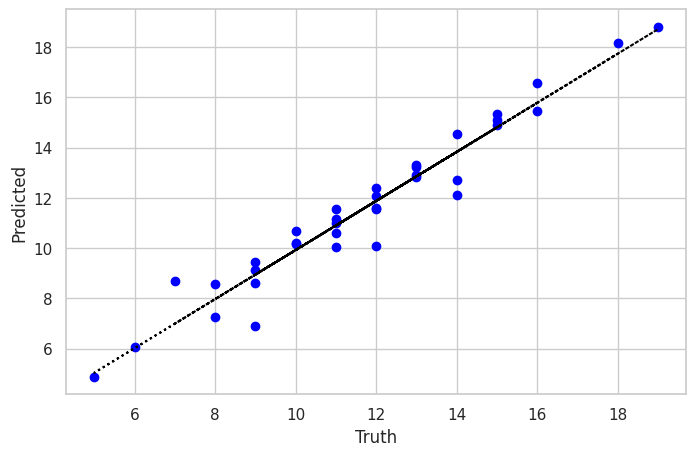

In [ ]:
n,m=polyfit(y_test,y_test_pred2,1)
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = y_test_pred2, c="blue")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")
plt.xlabel("Truth")
plt.ylabel("Predicted")

### 2. **Binary classification**


In [ ]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

In [ ]:
def train_binary_classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LogisticRegression()
    model2 = MultinomialNB()
    model3 = BaggingClassifier()
    model4 = DecisionTreeClassifier()
    model5 = LinearSVC()
    model6 = SGDClassifier()
    model7 = KNeighborsClassifier()
    model8 = RandomForestClassifier()
    model9 = GradientBoostingClassifier()

    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9 ]
    model_name_list = ['LogisticRegression', 'MultinomialNB', 'BaggingClassifier', 'DecisionTreeClassifier',
           'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

    # Dataframe for results
    results = pd.DataFrame(columns=["Test Accuracy", "Train Accuracy"], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_train = accuracy_score(y_train, y_train_pred)



        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy, accuracy_train ]

    return results

#### **Train models for first data group (after feature selection)**

In [ ]:
train_binary_classification_model(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test Accuracy Train Accuracy
LogisticRegression              0.944444       0.922118
MultinomialNB                       0.75       0.775701
BaggingClassifier               0.972222       0.996885
DecisionTreeClassifier          0.944444            1.0
LinearSVC                       0.888889       0.922118
SGDClassifier                   0.944444       0.878505
KNeighborsClassifier            0.944444       0.919003
RandomForestClassifier               1.0            1.0
GradientBoostingClassifier      0.972222       0.996885

**Note**: From above table, **BaggingClassifier and GradientBoostingClassifier** models are the best
model, so we will use confusion matrix to find which is the best model

* Implementing the (**GradientBoostingClassifier**) model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_test_pred_gb = gb_model.predict(X_test)

* Visualizing The Results using confusion matrix for **GradientBoostingClassifier**

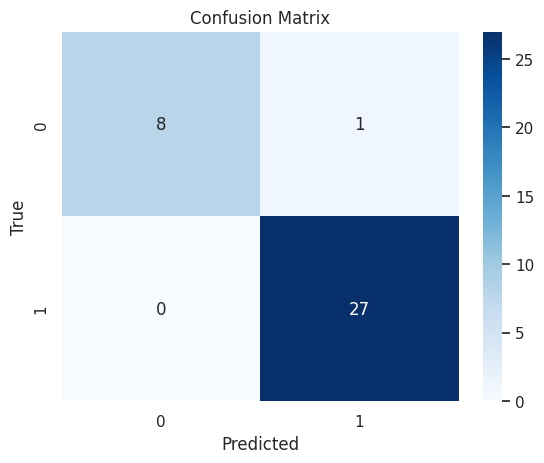

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_gb)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

* Implementing the (**BaggingClassifier**) model

In [ ]:
bagg_model = BaggingClassifier()
bagg_model.fit(X_train, y_train)

y_test_pred_bgg = bagg_model.predict(X_test)

* Visualizing The Results using confusion matrix for **BaggingClassifier**

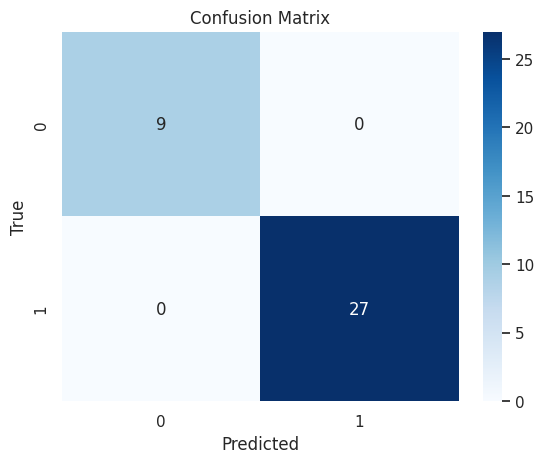

In [ ]:
cm2 = confusion_matrix(y_test, y_test_pred_bgg)

# Plot confusion matrix as a heatmap
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Note**: Based on the two confusion matrices presented above, it is evident that the **GradientBoostingClassifier** outperforms the other classifiers.

* **Saving** model as `pkl` file.

In [ ]:
with open('binay_classification_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

#### **Train DecisionTreeClassifier and Generates a graphical representation of the decision tree model.**

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

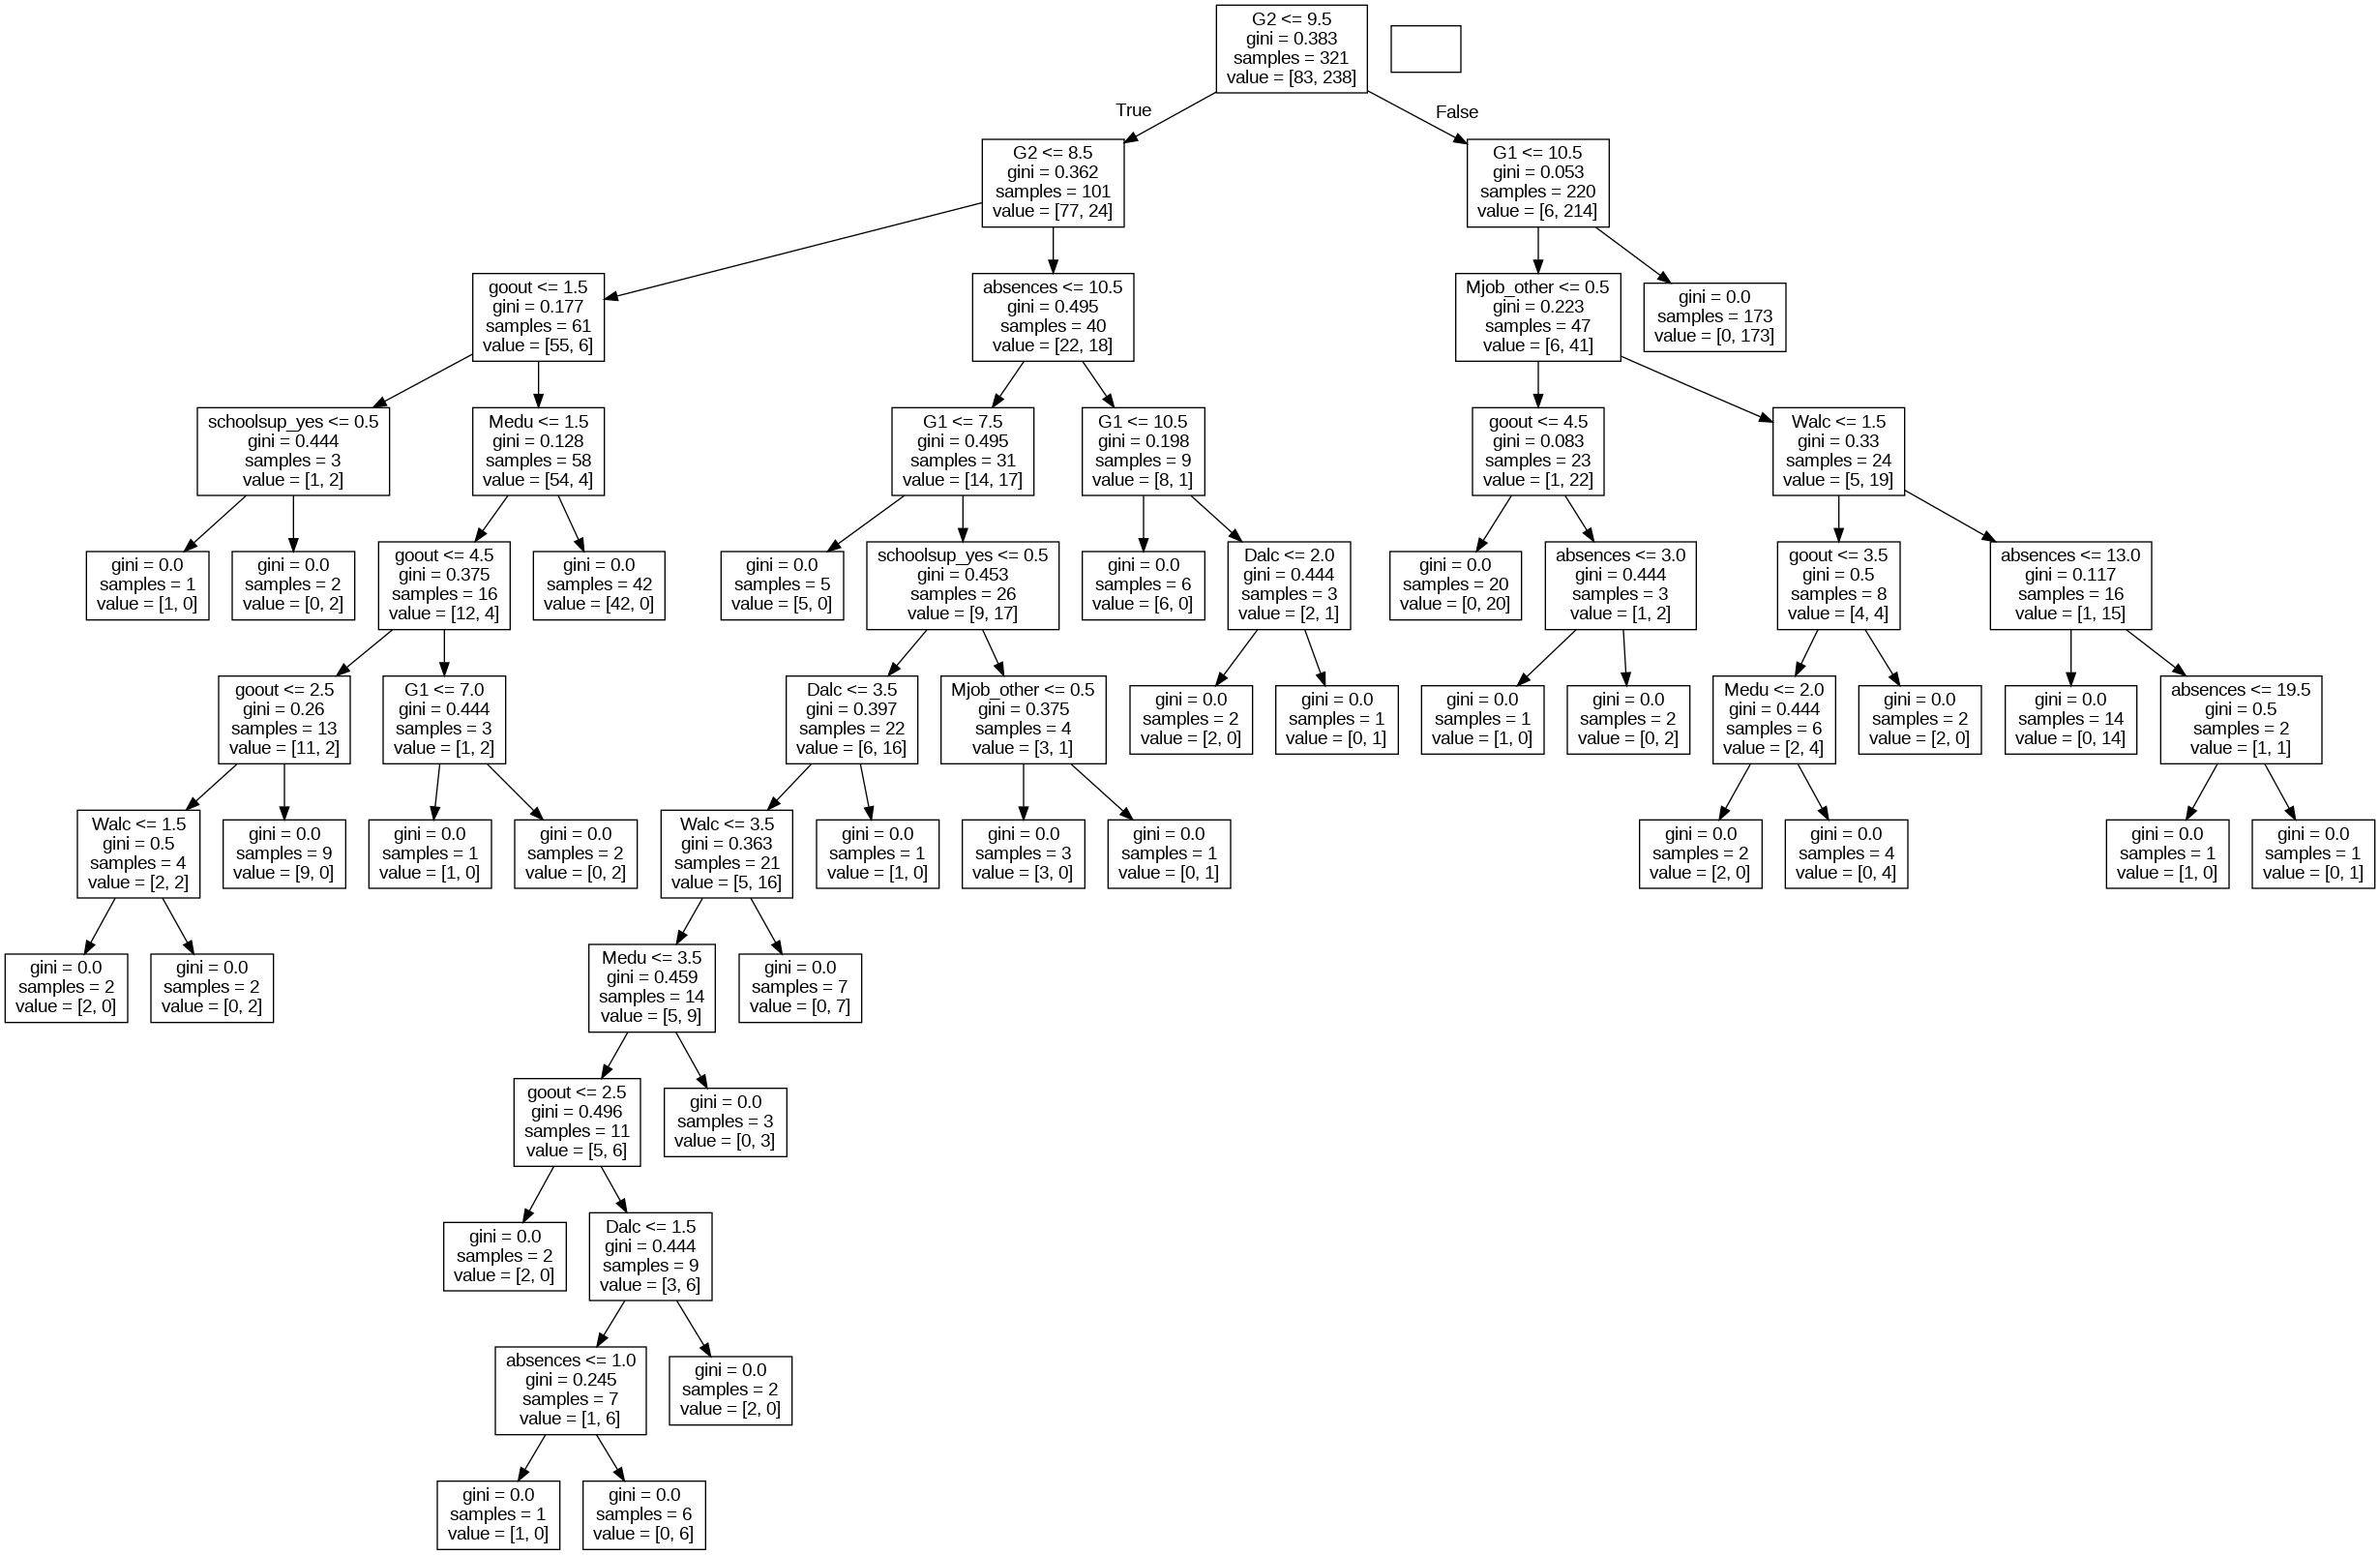

In [ ]:
dot_data = StringIO()
tree.export_graphviz(decision_tree_model, out_file=dot_data, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

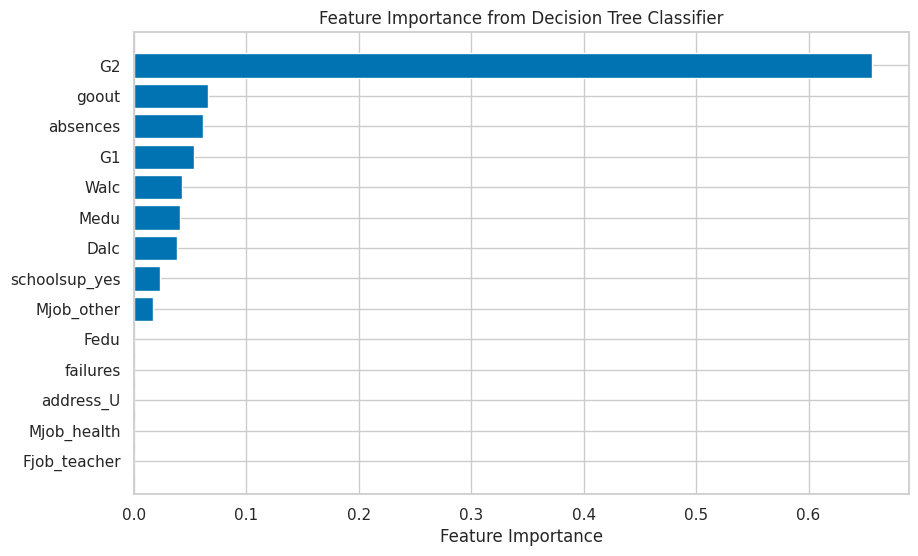

In [ ]:
# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Match feature importances with feature names (assuming you have feature names in X_train.columns)
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_feature_importances)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

Based on the above figure, the most important features, in descending order of importance, are as follows:
1. G2
2. goout
3. absences
4. G1
5. Walc
6. Medu
7. Dalc

#### **Train models for second data group (all features)**

In [ ]:
X_all_features_except_G3 = df_ohe.drop('G3',axis = 1)
y_G3 = df_ohe ['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

In [ ]:
train_binary_classification_model(X_all_features_except_G3, y_G3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test Accuracy Train Accuracy
LogisticRegression              0.972222       0.965732
MultinomialNB                       0.75       0.806854
BaggingClassifier               0.944444            1.0
DecisionTreeClassifier          0.916667            1.0
LinearSVC                       0.972222       0.971963
SGDClassifier                   0.944444       0.928349
KNeighborsClassifier            0.888889       0.922118
RandomForestClassifier          0.972222            1.0
GradientBoostingClassifier      0.972222            1.0

* LogisticRegression: Test accuracy is very close to train accuracy, suggesting a good balance between model fit and generalization. There's no clear sign of overfitting.

* MultinomialNB: Test accuracy is significantly lower than train accuracy, indicating some level of overfitting. The model may be too complex for the data.

* BaggingClassifier: Test accuracy is slightly lower than train accuracy but still quite high. There may be a slight overfitting, but the difference is not substantial.

* DecisionTreeClassifier: Similar to the BaggingClassifier, there's a slight drop in test accuracy compared to train accuracy, suggesting some overfitting.

* LinearSVC: Test accuracy is very close to train accuracy, similar to LogisticRegression, indicating a good model fit without overfitting.

* SGDClassifier: Test accuracy is slightly lower than train accuracy, suggesting a minor degree of overfitting.

* KNeighborsClassifier: Test accuracy is lower than train accuracy, indicating overfitting. The model may not be the best choice for this dataset.

* RandomForestClassifier: Similar to the BaggingClassifier, there's a slight drop in test accuracy compared to train accuracy, suggesting some overfitting.

* GradientBoostingClassifier: Similar to Random Forest and Bagging, there's a slight drop in test accuracy compared to train accuracy, indicating some overfitting.

**Note**: Based on the provided results, it appears that feature selection has indeed improved the accuracy of the models. This improvement can be observed in the test accuracy scores for various machine learning models. When you compare the test accuracy scores of the models with feature selection to their test accuracy scores without feature selection.

## **Conclusion**

In conclusion, our systematic approach, spanning from data understanding to deployment, yielded substantial benefits. Through exploratory analysis and preprocessing, we uncovered hidden patterns, facilitating the development of robust predictive models. Leveraging both regression and classification models, we achieved accurate predictions of final grades and identified students at risk of failing. The deployment of our application made our findings and models accessible for practical use, potentially improving educational outcomes and decision-making processes. This study exemplifies the power of data-driven insights and machine learning in enhancing decision support systems.